# INTRODUCTION

The following is an Exploratory Data Analysis of data from industry-leading audio streaming platform Spotify. This particular data, made public through Spotify's Web API, contains information of Top 50 song charts from 72 countries as well as Spotify's Top 50 Global Chart over the time period of 10/18/23 to 11/18/23. 

Through analyzing data from Spotify; the audio streaming service with the largest marketshare, we will gain insight into the current landscape of popular music. By identifying trends of Spotify listeners all over the world, we will discover the ways we can be both similar and unique when it comes to our taste, preferences and overall culture concerning music. Over the course of this analysis, I dived deep into many musical rabbit holes, discovering sonics and rhythms associated with particular regions that were completely new to me and I encourage you to do the same! Go through and filter the datatables listed below based on your own curiosities and interests!

This analysis is performed using R in conjunction with many of its useful packages to clean, wrangle, aggregate and visualize the data to our targeted project scopes.

# PREPARATION

Load the libraries that will be necessary throughout our data cleaning and analysis.

In [1]:
library(tidyverse)
library(ggplot2)
library(DT)
library(wordcloud2)
library(corrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



Import the raw dataset stored in csv format into RStudio using the read_csv function.

In [2]:
SpotifyRawData <- read_csv("/kaggle/input/spotify-global-top-50-song-data-oct-18-nov-19/universal_top_spotify_songs.csv")

Rows: 119806 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): spotify_id, name, artists, country, album_name
dbl  (17): daily_rank, daily_movement, weekly_movement, popularity, duration...
lgl   (1): is_explicit
date  (2): snapshot_date, album_release_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Get a better understanding of the raw data that we will be working with to determine the direction of our EDA. Refer to documentation of the dataset listed on both [Kaggle](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated) and [Spotify's Web API](https://developer.spotify.com/documentation/web-api/reference/get-audio-features).

In [3]:
head(SpotifyRawData)
colnames(SpotifyRawData)
glimpse(SpotifyRawData)
summary(SpotifyRawData)

spotify_id             name                                artists          
1 3un8UkiPHJjlsrTHQnisXH Từng Quen                           Wren Evans, itsnk
2 2KslE17cAJNHTsI2MI0jb2 Standing Next to You                Jung Kook        
3 3Ua0m0YmEjrMi9XErKcNiR Like Crazy                          Jimin            
4 2HRgqmZQC0MC7GeNuDIXHN Seven (feat. Latto) (Explicit Ver.) Jung Kook, Latto 
5 5h1BN75CEh8wdSwE1xrbSe Slow Dancing                        V                
6 4acXEYw7ayyJnm9GXDrqiL Hit Me Up (feat. Nomovodka)         Binz, Nomovodka  
  daily_rank daily_movement weekly_movement country snapshot_date popularity
1 1           0              1              VN      2023-11-19    76        
2 2           0             -1              VN      2023-11-19    97        
3 3           1              1              VN      2023-11-19    94        
4 4          -1             -1              VN      2023-11-19    87        
5 5           0              3              VN      2023-11-19    95        
6 6           0             -1              VN      2023-11-19    71        
  is_explicit ⋯ key loudness mode speechiness acousticness instrumentalness
1 FALSE       ⋯  7  -16.913  1    0.1700      0.2030       0.000000        
2 FALSE       ⋯  2   -4.389  0    0.0955      0.0447       0.000000        
3 FALSE       ⋯  7   -5.445  1    0.0419      0.0025       0.000000        
4  TRUE       ⋯ 11   -4.185  1    0.0440      0.3120       0.000000        
5 FALSE       ⋯  8   -7.758  1    0.0580      0.2570       0.004620        
6 FALSE       ⋯  9   -9.050  0    0.0355      0.4930       0.000222        
  liveness valence tempo   time_signature
1 0.1010   0.490    77.010 4             
2 0.3390   0.816   106.017 4             
3 0.3570   0.362   120.001 4             
4 0.0797   0.872   124.987 4             
5 0.0986   0.552   155.960 4             
6 0.0591   0.451    99.993 3

[1] "spotify_id"         "name"               "artists"           
 [4] "daily_rank"         "daily_movement"     "weekly_movement"   
 [7] "country"            "snapshot_date"      "popularity"        
[10] "is_explicit"        "duration_ms"        "album_name"        
[13] "album_release_date" "danceability"       "energy"            
[16] "key"                "loudness"           "mode"              
[19] "speechiness"        "acousticness"       "instrumentalness"  
[22] "liveness"           "valence"            "tempo"             
[25] "time_signature"

Rows: 119,806
Columns: 25
$ spotify_id         <chr> "3un8UkiPHJjlsrTHQnisXH", "2KslE17cAJNHTsI2MI0jb2",…
$ name               <chr> "Từng Quen", "Standing Next to You", "Like Crazy", …
$ artists            <chr> "Wren Evans, itsnk", "Jung Kook", "Jimin", "Jung Ko…
$ daily_rank         <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …
$ daily_movement     <dbl> 0, 0, 1, -1, 0, 0, 2, -1, -1, 0, 0, 2, -1, 1, 1, -3…
$ weekly_movement    <dbl> 1, -1, 1, -1, 3, -1, 0, 1, 3, 0, 0, 1, 1, 1, 2, -10…
$ country            <chr> "VN", "VN", "VN", "VN", "VN", "VN", "VN", "VN", "VN…
$ snapshot_date      <date> 2023-11-19, 2023-11-19, 2023-11-19, 2023-11-19, 20…
$ popularity         <dbl> 76, 97, 94, 87, 95, 71, 71, 71, 69, 71, 69, 68, 68,…
$ is_explicit        <lgl> FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FAL…
$ duration_ms        <dbl> 174545, 206019, 212241, 183550, 187026, 268200, 188…
$ album_name         <chr> "Từng Quen", "GOLDEN", "FACE", "GOLDEN", "Layover",…
$ album_releas

  spotify_id            name             artists            daily_rank   
 Length:119806      Length:119806      Length:119806      Min.   : 1.00  
 Class :character   Class :character   Class :character   1st Qu.:13.00  
 Mode  :character   Mode  :character   Mode  :character   Median :25.00  
                                                          Mean   :25.48  
                                                          3rd Qu.:38.00  
                                                          Max.   :50.00  
                                                                         
 daily_movement    weekly_movement     country          snapshot_date       
 Min.   :-46.000   Min.   :-46.000   Length:119806      Min.   :2023-10-18  
 1st Qu.: -1.000   1st Qu.: -2.000   Class :character   1st Qu.:2023-10-26  
 Median :  0.000   Median :  1.000   Mode  :character   Median :2023-11-03  
 Mean   :  1.198   Mean   :  6.026                      Mean   :2023-11-02  
 3rd Qu.:  2.000   3rd 

From looking through the raw data, we can see that there are many ways we can analyze Spotify streaming trends of the observed time period. This dataset contains many variables, both categorical and continuous, each providing further context and detail to a top streamed song and its relative chart position.

Daily ranking and daily movement would be interesting to study. From this variable we can track chart performance over time (using the snapshot_date variable) and gain understanding into the popularity and staying power of top songs. Tied to song popularity, we can analyze top streamed artists by tallying counts of their appearances (observations) on the charts. The raw data currently lists all credited artists in one variable but we can perform some data transformation to split the artists into seperate variables for an easier analysis. 

Turning our attention to the make-up of a top song, there are various provided measures and attributes that give description and categorization from a musicality perspective. Variables such as danceability, energy and valence would be interesting to work with to see what the commonalities/differences of a top song are from various scopes. 

Speaking of scope, the data spans across 72 individual top 50 country charts. Aggregating our analysis by geography would give insight into how the world streams music at a regional and global level. We could investigate the similarites or unique differences that countries have all over the world. In addition to the top 50 charts from the 72 countries, this datasest also contains data from Spotify's Global Top 50 chart. We can seperate these observations to perform a second analysis, focusing on streaming data of the most popular global songs. 

Data Limitations:

- no country origin of song or artist, would be interesting to know where the music was created
- no genre(s) listed as a song attribute, would be interesting to track genre popularity
- no metric of total streams associated with song

Now that we have some ideas on the scope and context of our analysis, let's perform the necessary cleaning and wrangling steps on our data.

#  DATA CLEANING AND WRANGLING

Check for and remove duplicate observations. Pass the spotify_id variable through the distinct function.

In [4]:
Spotify_Distinct <- SpotifyRawData %>% 
  distinct(spotify_id, .keep_all = TRUE)

nrow(Spotify_Distinct)

[1] 3388

There are only 3388 unique spotify_id values out of a dataframe of 119,806 observations. This variable is not the unique identifier for each observation and therefore is not unique to the specific chart position of a Top 50 song on that specific date. Upon referring to [Spotify's Web API documentation](http://developer.spotify.com/documentation/web-api/reference/get-audio-features), it is discovered that the spotify_id variable is the unique identifier of a song. 

Now we know that there were 3388 unique songs that had placement in the various Top 50 charts within this dataframe -- 72 countries and 1 Top 50 Global Chart.

As we are going to breakdown this EDA into 2 parts: an analysis of consumer behavior by countries as well as an analysis of trends within the Top 50 Global chart, let's seperate the observations in this dataframe accordingly.

Top 50 Global Ranking data can be identified by observations that have NA values within the country variable.

In [5]:
SpotifyGlobalTop50 <- subset(SpotifyRawData, is.na(SpotifyRawData$country))

SpotifyRawData1 <- SpotifyRawData %>% 
  drop_na(country)

As we will be grouping our data by country later on, it would be useful to have the full country name instead of just the shortened country code for an easier, clearer analysis. 

Import dataset available on kaggle that contains both the country code and it's corresponding full name so we can join the 2 dataframes together.

In [6]:
CountryCode <- read_csv("/kaggle/input/countries-of-the-world-2023/world-data-2023.csv")

Rows: 195 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): Country, Abbreviation, Agricultural Land( %), Capital/Major City, ...
dbl  (9): Birth Rate, Calling Code, Fertility Rate, Infant mortality, Life e...
num  (7): Density
(P/Km2), Land Area(Km2), Armed Forces size, Co2-Emissions,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rename the join variable (country code) in both dataframes so they are the same and select only the necessary variables of the newly imported dataset.

Execute a left join, available through the dplyr package.

In [7]:
SpotifyRawData2 <- SpotifyRawData1 %>% 
  rename(country_code = country)
  
CountryCode <- CountryCode %>% 
  rename(country_code = Abbreviation) %>% 
  select(Country, country_code)

SpotifyMerged <- SpotifyRawData2 %>% 
  left_join(CountryCode, by = "country_code")

SpotifyMerged %>%
  select(country_code, Country) %>%
  head(., 10)

country_code Country
1  VN           Vietnam
2  VN           Vietnam
3  VN           Vietnam
4  VN           Vietnam
5  VN           Vietnam
6  VN           Vietnam
7  VN           Vietnam
8  VN           Vietnam
9  VN           Vietnam
10 VN           Vietnam

Check if there are any NA's in the joined country variable, find their corresponding country code so we can identify what their values should be.

In [8]:
NAinCountry <- subset(SpotifyMerged, is.na(SpotifyMerged$Country))
unique(NAinCountry$country_code)

[1] "TW" "IE" "HK"

Ireland, Hong Kong and Taiwan weren't in the country code table resulting in the NA values. Replace these NA values accordingly and perform a check to ensure there are no more missing values in the country variable.

In [9]:
SpotifyMerged1 <- SpotifyMerged %>% 
  mutate(Country = replace(Country, country_code == "HK", "Hong Kong")) %>% 
  mutate(Country = replace(Country, country_code == "IE", "Ireland")) %>% 
  mutate(Country = replace(Country, country_code == "TW", "Taiwan"))

HK <- SpotifyMerged1 %>% 
  filter(country_code == "HK")
IE <- SpotifyMerged1 %>% 
  filter(country_code == "IE")
TW <- SpotifyMerged1 %>% 
  filter(country_code == "TW")

print(paste("Country has", sum(is.na(SpotifyMerged1$Country)), "missing values"))

[1] "Country has 0 missing values"


Check for missing values in the other variables.

In [10]:
print(paste("spotify has", sum(is.na(SpotifyMerged1$spotify_id)), "missing values"))
print(paste("name has", sum(is.na(SpotifyMerged1$name)), "missing values"))
print(paste("artists has", sum(is.na(SpotifyMerged1$artists)), "missing values"))
print(paste("daily_rank has", sum(is.na(SpotifyMerged1$daily_rank)), "missing values"))
print(paste("daily_movement has", sum(is.na(SpotifyMerged1$daily_movement)), "missing values"))
print(paste("weekly_movement has", sum(is.na(SpotifyMerged1$weekly_movement)), "missing values"))
print(paste("country_code has", sum(is.na(SpotifyMerged1$country_code)), "missing values"))
print(paste("snapshot_date has", sum(is.na(SpotifyMerged1$snapshot_date)), "missing values"))
print(paste("popularity has", sum(is.na(SpotifyMerged1$popularity)), "missing values"))
print(paste("is_explicit has", sum(is.na(SpotifyMerged1$is_explicit)), "missing values"))
print(paste("duration_ms has", sum(is.na(SpotifyMerged1$duration_ms)), "missing values"))
print(paste("album_name has", sum(is.na(SpotifyMerged1$album_name)), "missing values"))
print(paste("album_release_date has", sum(is.na(SpotifyMerged1$album_release_date)), "missing values"))
print(paste("danceability has", sum(is.na(SpotifyMerged1$danceability)), "missing values"))
print(paste("energy has", sum(is.na(SpotifyMerged1$energy)), "missing values"))
print(paste("key has", sum(is.na(SpotifyMerged1$key)), "missing values"))
print(paste("loudness has", sum(is.na(SpotifyMerged1$loudness)), "missing values"))
print(paste("mode has", sum(is.na(SpotifyMerged1$mode)), "missing values"))
print(paste("speechiness has", sum(is.na(SpotifyMerged1$speechiness)), "missing values"))
print(paste("acousticness has", sum(is.na(SpotifyMerged1$acousticness)), "missing values"))
print(paste("instrumentalness has", sum(is.na(SpotifyMerged1$instrumentalness)), "missing values"))
print(paste("liveness has", sum(is.na(SpotifyMerged1$liveness)), "missing values"))
print(paste("valence has", sum(is.na(SpotifyMerged1$valence)), "missing values"))
print(paste("tempo has", sum(is.na(SpotifyMerged1$tempo)), "missing values"))
print(paste("time_signature has", sum(is.na(SpotifyMerged1$time_signature)), "missing values"))

[1] "spotify has 0 missing values"
[1] "name has 21 missing values"
[1] "artists has 21 missing values"
[1] "daily_rank has 0 missing values"
[1] "daily_movement has 0 missing values"
[1] "weekly_movement has 0 missing values"
[1] "country_code has 0 missing values"
[1] "snapshot_date has 0 missing values"
[1] "popularity has 0 missing values"
[1] "is_explicit has 0 missing values"
[1] "duration_ms has 0 missing values"
[1] "album_name has 22 missing values"
[1] "album_release_date has 22 missing values"
[1] "danceability has 0 missing values"
[1] "energy has 0 missing values"
[1] "key has 0 missing values"
[1] "loudness has 0 missing values"
[1] "mode has 0 missing values"
[1] "speechiness has 0 missing values"
[1] "acousticness has 0 missing values"
[1] "instrumentalness has 0 missing values"
[1] "liveness has 0 missing values"
[1] "valence has 0 missing values"
[1] "tempo has 0 missing values"
[1] "time_signature has 0 missing values"


Use the stringr package to create a new variable (from the 'artists' variable) that has the count of artists on a song.

Apply variable transformation steps to SpotifyGlobalTop50 dataframe as well.

In [11]:
SpotifyMerged1$number_of_artists <- str_count(SpotifyMerged1$artists, ",") + 1
SpotifyGlobalTop50$number_of_artists <- str_count(SpotifyGlobalTop50$artists, ",") + 1

Transform the duration_ms variable into a more undestandable unit of measurement. Create variables that display song duration in seconds and minutes, drop original.

In [12]:
SpotifyMerged2 <- SpotifyMerged1 %>% 
  mutate(duration_s = (duration_ms/1000)) %>% 
  mutate(duration_m =(duration_s/60)) %>% 
  select(-c(duration_ms))

SpotifyGlobalTop50 <- SpotifyGlobalTop50 %>% 
  mutate(duration_s = (duration_ms/1000)) %>% 
  mutate(duration_m =(duration_s/60)) %>% 
  select(-c(duration_ms))

Arrange columns.

In [13]:
SpotifyMerged2 <- SpotifyMerged2 %>% 
  select(1:3, number_of_artists, daily_rank, daily_movement, weekly_movement, country_code, Country, everything())

An EDA comparing Spotify listeners by country might be difficult to summarize as there are 72 in total, so using the corresponding continent at times would help contribute to a more cleaner, digestable analysis.

Import and join dataset found on Kaggle which has the already used country code variable along with the matching continent.

Perform a check by seeing if there are any missing values in the newly joined continent variable.

These steps do not need to be applied to the SpotifyGlobalTop50 dataframe as it doesn't contain any country information. 

In [14]:
Continents <- read_csv("/kaggle/input/world-population-dataset/world_population.csv")

Continents <- Continents %>% 
  rename(Country = `Country/Territory`) %>% 
  select(Country, Continent)
  
SpotifyMerged3 <- SpotifyMerged2 %>% 
  left_join(Continents, by = "Country")

print(paste("Continent has", sum(is.na(SpotifyMerged3$Continent)), "missing values"))

Rows: 234 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): CCA3, Country/Territory, Capital, Continent
dbl (13): Rank, 2022 Population, 2020 Population, 2015 Population, 2010 Popu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Continent has 0 missing values"


Arrange columns.

In [15]:
SpotifyMerged3 <- SpotifyMerged3 %>% 
  select(1:9, Continent, everything())

The 'artists' variable contains all performing artists credited on a song. It lists the main artist first and then any featuring artists seperated by a comma. It would be useful to seperate this string into 2 new variables (primary artist, featuring artists) in order to easily perform data aggregation on top song artists later on.

Use the stringr package to split these string values accordingly.

In [16]:
SpotifyMerged3[c('primary_artist', 'featuring_artist')] <- str_split_fixed(SpotifyMerged3$artists, ',', n = 2)
SpotifyGlobalTop50[c('primary_artist', 'featuring_artist')] <- str_split_fixed(SpotifyGlobalTop50$artists, ',', n = 2)

Arrange columns and view new data frame to check if variable creation was succesful.

Look into summary of transformed data frame, explore by variable to see if anything stands out and needs to be addressed

In [17]:
SpotifyMerged3 <-SpotifyMerged3 %>% 
  select(1:3, primary_artist, featuring_artist, everything())

head(SpotifyMerged3)
summary(SpotifyMerged3)

spotify_id             name                                artists          
1 3un8UkiPHJjlsrTHQnisXH Từng Quen                           Wren Evans, itsnk
2 2KslE17cAJNHTsI2MI0jb2 Standing Next to You                Jung Kook        
3 3Ua0m0YmEjrMi9XErKcNiR Like Crazy                          Jimin            
4 2HRgqmZQC0MC7GeNuDIXHN Seven (feat. Latto) (Explicit Ver.) Jung Kook, Latto 
5 5h1BN75CEh8wdSwE1xrbSe Slow Dancing                        V                
6 4acXEYw7ayyJnm9GXDrqiL Hit Me Up (feat. Nomovodka)         Binz, Nomovodka  
  primary_artist featuring_artist number_of_artists daily_rank daily_movement
1 Wren Evans      itsnk           2                 1           0            
2 Jung Kook                       1                 2           0            
3 Jimin                           1                 3           1            
4 Jung Kook       Latto           2                 4          -1            
5 V                               1                 5           0            
6 Binz            Nomovodka       2                 6           0            
  weekly_movement country_code ⋯ mode speechiness acousticness instrumentalness
1  1              VN           ⋯ 1    0.1700      0.2030       0.000000        
2 -1              VN           ⋯ 0    0.0955      0.0447       0.000000        
3  1              VN           ⋯ 1    0.0419      0.0025       0.000000        
4 -1              VN           ⋯ 1    0.0440      0.3120       0.000000        
5  3              VN           ⋯ 1    0.0580      0.2570       0.004620        
6 -1              VN           ⋯ 0    0.0355      0.4930       0.000222        
  liveness valence tempo   time_signature duration_s duration_m
1 0.1010   0.490    77.010 4              174.545    2.909083  
2 0.3390   0.816   106.017 4              206.019    3.433650  
3 0.3570   0.362   120.001 4              212.241    3.537350  
4 0.0797   0.872   124.987 4              183.550    3.059167  
5 0.0986   0.552   155.960 4              187.026    3.117100  
6 0.0591   0.451    99.993 3              268.200    4.470000

  spotify_id            name             artists          primary_artist    
 Length:118204      Length:118204      Length:118204      Length:118204     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 featuring_artist   number_of_artists   daily_rank    daily_movement   
 Length:118204      Min.   : 1.00     Min.   : 1.00   Min.   :-46.000  
 Class :character   1st Qu.: 1.00     1st Qu.:13.00   1st Qu.: -1.000  
 Mode  :character   Median : 1.00     Median :25.00   Median :  0.000  
                    Mean   : 1.58     Mean   :25.47   Mean   :  1.198  
                    3rd 

The created song duration variables contain values of 0, which is illogical. Subset into seperate dataframe to investigate.

In [18]:
duration_s_0 <- SpotifyMerged3 %>% 
  filter(duration_s == 0)%>%
  arrange(duration_s)

head(duration_s_0)

spotify_id             name artists primary_artist featuring_artist
1 7lyv2sysHCzFjypILxAynT NA   NA      NA                             
2 7lyv2sysHCzFjypILxAynT NA   NA      NA                             
3 7lyv2sysHCzFjypILxAynT NA   NA      NA                             
4 7lyv2sysHCzFjypILxAynT NA   NA      NA                             
5 7lyv2sysHCzFjypILxAynT NA   NA      NA                             
6 7lyv2sysHCzFjypILxAynT NA   NA      NA                             
  number_of_artists daily_rank daily_movement weekly_movement country_code ⋯
1 NA                36         14             14              VE           ⋯
2 NA                18         32             32              SV           ⋯
3 NA                 5         45             45              PE           ⋯
4 NA                32         18             18              PA           ⋯
5 NA                46          4              4              NI           ⋯
6 NA                25         25             25              HN           ⋯
  mode speechiness acousticness instrumentalness liveness valence tempo 
1 1    0.0517      0.0232       0                0.0699   0.533   90.019
2 1    0.0517      0.0232       0                0.0699   0.533   90.019
3 1    0.0517      0.0232       0                0.0699   0.533   90.019
4 1    0.0517      0.0232       0                0.0699   0.533   90.019
5 1    0.0517      0.0232       0                0.0699   0.533   90.019
6 1    0.0517      0.0232       0                0.0699   0.533   90.019
  time_signature duration_s duration_m
1 4              0          0         
2 4              0          0         
3 4              0          0         
4 4              0          0         
5 4              0          0         
6 4              0          0

There are only 21 observations with duration of 0 seconds, many other variables associated with song information have missing values.

However the musical attributes associated with song have normal values. We can keep these 21 observations, as their amount of missing values isn't enough to skew any analysis findings.

Create a key identifier, unique to each observation in the dataframe (represents certain chart position on certain date).

In [19]:
SpotifyMerged4 <-SpotifyMerged3 %>% 
  mutate(ID = row_number()) %>% 
  select(ID, everything())

SpotifyGlobalTop50 <-SpotifyGlobalTop50 %>% 
  mutate(ID = row_number()) %>% 
  select(ID, everything())

head(SpotifyMerged4)

ID spotify_id             name                               
1 1  3un8UkiPHJjlsrTHQnisXH Từng Quen                          
2 2  2KslE17cAJNHTsI2MI0jb2 Standing Next to You               
3 3  3Ua0m0YmEjrMi9XErKcNiR Like Crazy                         
4 4  2HRgqmZQC0MC7GeNuDIXHN Seven (feat. Latto) (Explicit Ver.)
5 5  5h1BN75CEh8wdSwE1xrbSe Slow Dancing                       
6 6  4acXEYw7ayyJnm9GXDrqiL Hit Me Up (feat. Nomovodka)        
  artists           primary_artist featuring_artist number_of_artists
1 Wren Evans, itsnk Wren Evans      itsnk           2                
2 Jung Kook         Jung Kook                       1                
3 Jimin             Jimin                           1                
4 Jung Kook, Latto  Jung Kook       Latto           2                
5 V                 V                               1                
6 Binz, Nomovodka   Binz            Nomovodka       2                
  daily_rank daily_movement weekly_movement ⋯ mode speechiness acousticness
1 1           0              1              ⋯ 1    0.1700      0.2030      
2 2           0             -1              ⋯ 0    0.0955      0.0447      
3 3           1              1              ⋯ 1    0.0419      0.0025      
4 4          -1             -1              ⋯ 1    0.0440      0.3120      
5 5           0              3              ⋯ 1    0.0580      0.2570      
6 6           0             -1              ⋯ 0    0.0355      0.4930      
  instrumentalness liveness valence tempo   time_signature duration_s
1 0.000000         0.1010   0.490    77.010 4              174.545   
2 0.000000         0.3390   0.816   106.017 4              206.019   
3 0.000000         0.3570   0.362   120.001 4              212.241   
4 0.000000         0.0797   0.872   124.987 4              183.550   
5 0.004620         0.0986   0.552   155.960 4              187.026   
6 0.000222         0.0591   0.451    99.993 3              268.200   
  duration_m
1 2.909083  
2 3.433650  
3 3.537350  
4 3.059167  
5 3.117100  
6 4.470000

Spotify uses integers to represent categorical data in certain variables. Modify these values, changing them into correspoinding character form by referencing [Spotify API's data dictionary](http://developer.spotify.com/documentation/web-api/reference/get-audio-features).

Variables that need values moodified:

- Mode
- Key

In [20]:
SpotifyMerged4$mode[SpotifyMerged4$mode == 0] <- "Minor"
SpotifyMerged4$mode[SpotifyMerged4$mode == 1] <- "Major"

SpotifyGlobalTop50$mode[SpotifyGlobalTop50$mode == 0] <- "Minor"
SpotifyGlobalTop50$mode[SpotifyGlobalTop50$mode == 1] <- "Major"

unique(SpotifyMerged4$key)

SpotifyMerged4$key[SpotifyMerged4$key == 0] <- "C"
SpotifyMerged4$key[SpotifyMerged4$key == 1] <- "C#, D♭"
SpotifyMerged4$key[SpotifyMerged4$key == 2] <- "D"
SpotifyMerged4$key[SpotifyMerged4$key == 3] <- "D#, E♭"
SpotifyMerged4$key[SpotifyMerged4$key == 4] <- "E"
SpotifyMerged4$key[SpotifyMerged4$key == 5] <- "F"
SpotifyMerged4$key[SpotifyMerged4$key == 6] <- "F#, G♭"
SpotifyMerged4$key[SpotifyMerged4$key == 7] <- "G"
SpotifyMerged4$key[SpotifyMerged4$key == 8] <- "G#, A♭"
SpotifyMerged4$key[SpotifyMerged4$key == 9] <- "A"
SpotifyMerged4$key[SpotifyMerged4$key == 10] <- "A#, B♭"
SpotifyMerged4$key[SpotifyMerged4$key == 11] <- "B"

SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 0] <- "C"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 1] <- "C#, D♭"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 2] <- "D"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 3] <- "D#, E♭"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 4] <- "E"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 5] <- "F"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 6] <- "F#, G♭"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 7] <- "G"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 8] <- "G#, A♭"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 9] <- "A"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 10] <- "A#, B♭"
SpotifyGlobalTop50$key[SpotifyGlobalTop50$key == 11] <- "B"

summary(SpotifyMerged4)

[1]  7  2 11  8  9  6  5  3  0  4  1 10

       ID          spotify_id            name             artists         
 Min.   :     1   Length:118204      Length:118204      Length:118204     
 1st Qu.: 29552   Class :character   Class :character   Class :character  
 Median : 59102   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 59102                                                           
 3rd Qu.: 88653                                                           
 Max.   :118204                                                           
                                                                          
 primary_artist     featuring_artist   number_of_artists   daily_rank   
 Length:118204      Length:118204      Min.   : 1.00     Min.   : 1.00  
 Class :character   Class :character   1st Qu.: 1.00     1st Qu.:13.00  
 Mode  :character   Mode  :character   Median : 1.00     Median :25.00  
                                       Mean   : 1.58     Mean   :25.47  
                                   

Taking a closer look into the summary of the dataframe, it is discovered that both liveness and instrumentalness have distribution that is almost uniform with the majority of their values being small and close to 0. Drop from dataframe as they won't be used in our analysis. 

In [21]:
SpotifyMerged4 <- SpotifyMerged4 %>% 
  select(-c(liveness, instrumentalness))

SpotifyGlobalTop50 <- SpotifyGlobalTop50 %>% 
  select(-c(liveness, instrumentalness))

Arrange the columns of SpotifyGlobalTop50 as we have done for SpotifyMerged4, grouping similar/corresponding ones next to each other.

In [22]:
SpotifyGlobalTop50 <- SpotifyGlobalTop50 %>% 
  select(1:3, primary_artist, featuring_artist, number_of_artists, everything()) %>% 
  select(-country)

After cleaning and wrangling this Spotify data, we have 2 datasets ready to be analyzed at their targeted scopes. The first (SpotifyGlobalTop50) will be used to gain insights into Spotify listeners at a global level. The second (SpotifyMerged4) will be used to analyze Spotify music consumption at a geographic level (by country and continent), identifying trends unique to region or conversely shared tendencies across the globe. 

# ANALYSIS I: SPOTIFY GLOBAL TOP 50 

**ANALYSIS OF CHART POSITION OF TOP STREAMED SONGS OVER TIME**

Daily ranking would be a good measure to see top song performance over time:

- which songs have the most staying power on the charts and are ultimately the most popular?
- which songs rankings fluctuate the most (positive and negative)?
- are there events in time that effect song ranking (ex: an album release)

Let's work with this variable to discover what were the most popular charting songs on Spotify during this time span.

As there are many songs that had placement on Spotify's Global Top 50 Chart, lets start narrowing our scope to the very top songs. Find out how many dates there are in the data to identify the amount of opportunities a song has to rank on the Global Chart.

In [23]:
unique(SpotifyGlobalTop50$snapshot_date)

[1] "2023-11-18" "2023-11-17" "2023-11-16" "2023-11-15" "2023-11-14"
 [6] "2023-11-13" "2023-11-12" "2023-11-11" "2023-11-10" "2023-11-09"
[11] "2023-11-08" "2023-11-07" "2023-11-06" "2023-11-05" "2023-11-04"
[16] "2023-11-03" "2023-11-02" "2023-11-01" "2023-10-31" "2023-10-30"
[21] "2023-10-29" "2023-10-28" "2023-10-27" "2023-10-26" "2023-10-25"
[26] "2023-10-24" "2023-10-23" "2023-10-22" "2023-10-21" "2023-10-20"
[31] "2023-10-19" "2023-10-18"

There were 32 dates recorded, so the most times a song can appear within this dataframe would be 32. Add a count of chart occurences for each song in the dataframe and filter in values of 32, thus creating a summary of Songs that ranked in the Global Top 50 for every date recorded.

23 songs appeared on the Top 50 for every date recorded. Interesting to note that almost half of the Spotify Global chart was taken up by the same 23 songs for the time measured. 

23 Songs would be too many to visualize in a time series graph, so let's narrow our scope to track the top 10 songs. Calculate the mean daily rank of each song and keep the top 10 observations.

In [24]:
Top10summary <- SpotifyGlobalTop50 %>% 
  add_count(name, name = "Count") %>% 
  arrange(desc(Count))%>% 
  filter(Count == 32) %>% 
  group_by(name, artists) %>% 
  summarise(mean_rank = round(mean(daily_rank),2), .groups = "drop") %>% 
  arrange(mean_rank) %>% 
  slice(1:10)

head(Top10summary, 10) %>% 
   DT::datatable()

HTML widgets cannot be represented in plain text (need html)

Now that we have identified the top 10 songs according to their mean daily rank, let's join our data back to our original dataset and plot these song rankings over the 32 measured days.

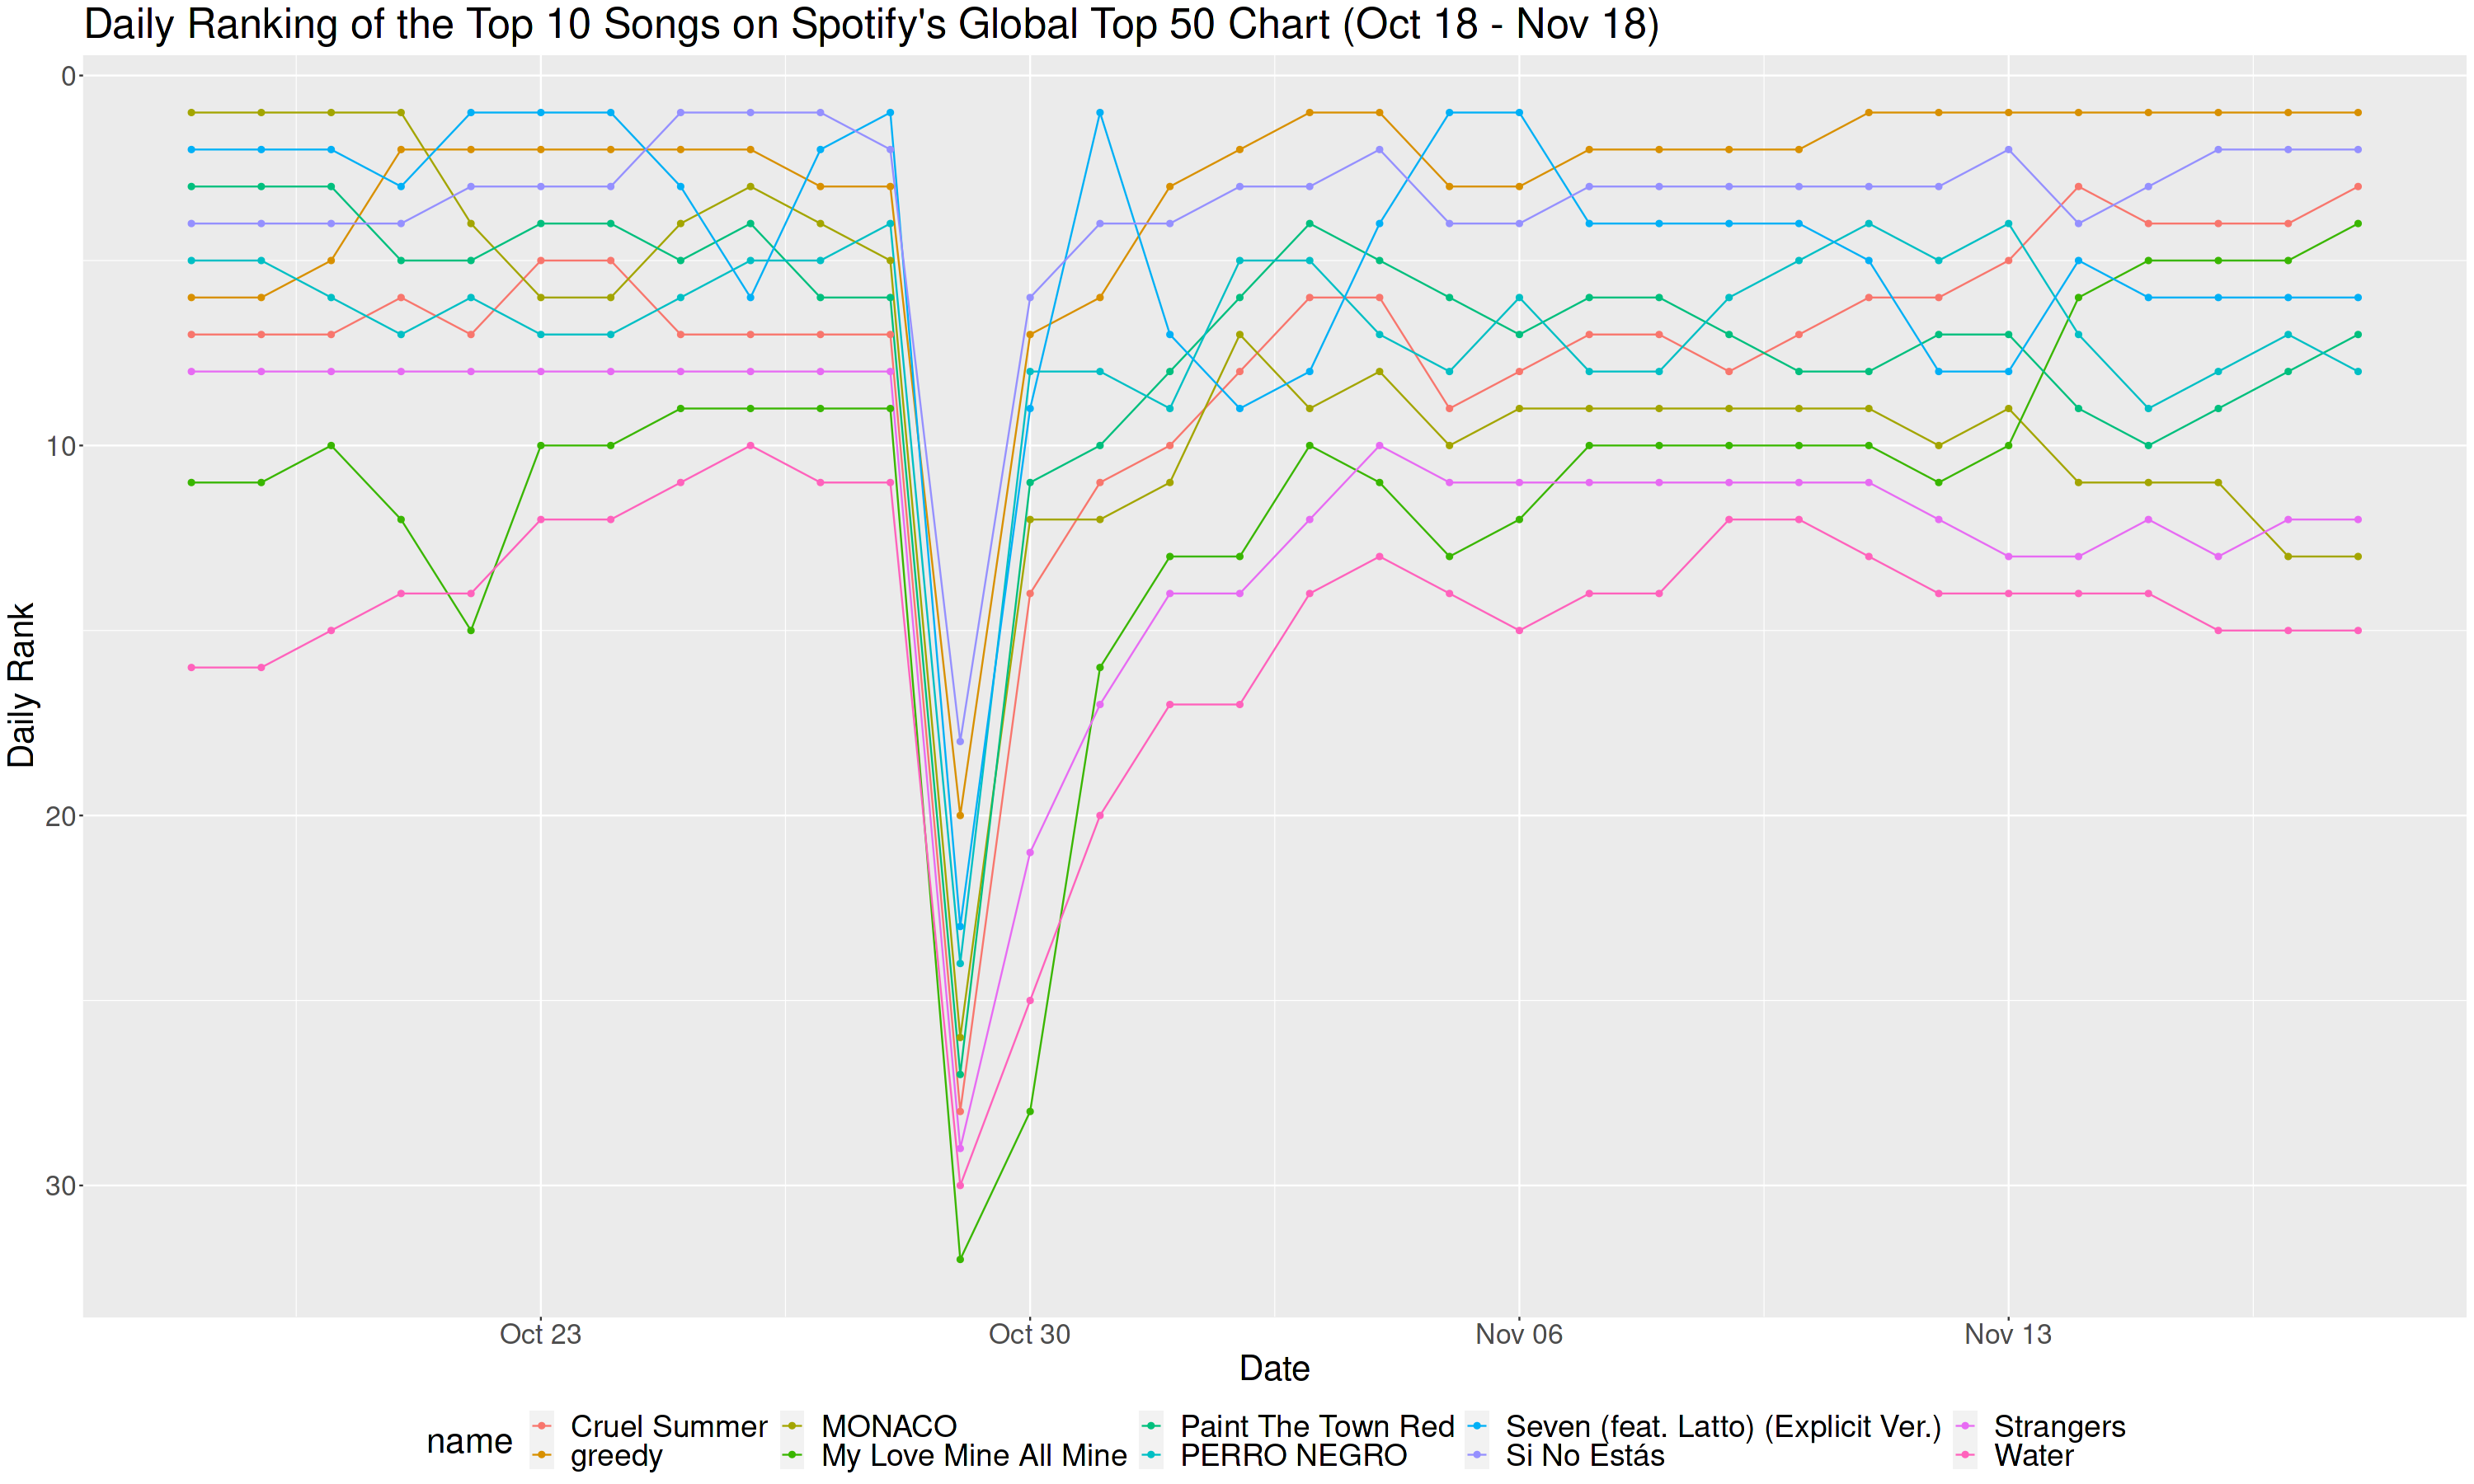

In [25]:
Top10summary1 <- SpotifyGlobalTop50 %>% 
  right_join(Top10summary, by = "name")

options(repr.plot.width = 25, repr.plot.height = 15)

ggplot(data = Top10summary1, aes(x = snapshot_date, y = daily_rank, group = name, color = name)) +
  geom_line() + geom_point() + labs(title = "Daily Ranking of the Top 10 Songs on Spotify's Global Top 50 Chart (Oct 18 - Nov 18)", x = "Date", 
                                    y = "Daily Rank") + theme(legend.position = "bottom", legend.text = element_text(size = 22),
text = element_text(size = 25)) + scale_y_reverse()

From just looking at this graph, what first takes all our attention is the sharp dip in rankings that occur on October 29. Every song loses their position and none have placements within the top 15 spots. 

Although this decline is very steep, the songs start to climb back immediately after October 29. It is noteworthy that even though the songs seem to recover quickly, many experience more fluctuation in position after this event that they didn't experience prior. This points to an event in music such as an album release which could cause such disruption within Spotify's global charts.

Beside that noticeable phenomenon, here are some insights/trends observed:

- greedy by Tate McRae (top song by mean daily rank) stayed within the top 5 the longest --- 27/32 days
- greedy by Tate McRae also had the most days positioned at #1 --- 10 days
- 4 of the 10 songs we have focused on reach #1 on the Global Chart --- MONACO, Seven, Si No Estas and greedy
- out of these 4 songs to reach #1, MONACO by Bad Bunny had the largest decline over the time span, rank at 13 on November 18
- there are 8 days where songs outside of our observed top 10 charted at #1
- Strangers by Kenya Grace held steady at #9 for 11 straight days
- My Love All Mine by Mitski had the most positive climb over time, being first measured at #11 to its position on November 18 at #4
- My Love All Mine also had the highest climb between its lowest measured point (#32 on the infamous Oct 29th) and highest point (#4)
- Seven By Jung Kook featuring Latto climbed to #1 on 4 different occasions, totalled 7 days at that position

Let's subset observations from October 29 into a seperate dataframe to investigate further.

In addition, it would be interesting to see what were the other songs that charted at #1.

In [26]:
dailyrank1others <- SpotifyGlobalTop50 %>%  
  filter(daily_rank == 1) %>%  
  filter(snapshot_date == "2023-10-29" | snapshot_date == "2023-10-30" | snapshot_date == "2023-11-01" |
           snapshot_date == "2023-11-02" | snapshot_date == "2023-11-07" | snapshot_date == "2023-11-08" |
           snapshot_date == "2023-11-09" |snapshot_date == "2023-11-10") %>%  
  select(snapshot_date, name, artists, daily_rank, daily_movement) %>%  
  arrange(snapshot_date)

head(dailyrank1others, 8) %>% 
  DT::datatable()

Oct29 <- SpotifyGlobalTop50 %>%  
  filter(snapshot_date == "2023-10-29") %>%  
  select(name, artists, album_name, album_release_date, daily_rank, daily_movement)

head(Oct29, 50) %>% 
  DT::datatable()

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

As predicted, the disruption in ranking of the observed top 10 songs was a result of an album release. It turns out that one of the most recognized artists on the planet, Taylor Swift was behind this shift in the streaming ecoysystem. This release of her latest album titled "1989 (Taylor's Version) is the latest chapter in a series of re-releases of her previous albums, with the intention to take back the ownership and rights to her music. 

19 of her songs from this album ranked in the top 20 instantaneously, with "Style" taking the top spot. Afterwards, a different song from her album, "Is It Over Now" reached #1, staying atop for 3 days, it's popularity probably due to the fact that it was an unreleased track that never made it on the original 2014 version. The instant high charting of all songs easily makes this the most successful album release during this time period.

Beside album cuts from 1989 (Taylor's Version), one other song which was outside of our observed top 10 songs reached #1. Jung Kook's song "Standing Next to You" stayed atop that Spotify Global Top 50 for 4 days straight from November 7 to November 10. It would be interesting to find out if this song ranking was also due to an album release from Jung Kook. 

Lets analyze other significant chart movement to find out if there were any major musical events during this time period (positive movement > 10) exlcuding Taylor Swifts re-release of her 1989 album.

In [27]:
TopMovement <- SpotifyGlobalTop50 %>% 
  select(snapshot_date, name, daily_movement, daily_rank, artists, album_name, album_release_date) %>% 
  filter(!album_name == "1989 (Taylor's Version)") %>% 
  filter(!album_name == "1989 (Taylor's Version) [Deluxe]") %>% 
  filter(!snapshot_date == "2023-10-18") %>%  # first recorded date, all songs movement recorded as first time on chart
  arrange(desc(daily_movement)) %>% 
  filter(daily_movement >= 10)

head(TopMovement, 51) %>%
  DT::datatable()

HTML widgets cannot be represented in plain text (need html)

As expected, Jung Kook released an album (GOLDEN), resulting in his song "Standing Next to You" having the second largest movement, debuting at #2 on the top 50. Interstingly, a song that had already charted and reached #1 (Seven) has the largest recorded positive movement, even though it had a previous day position of 4 (refer to time series graph). How can that be possible?

My theory is that Seven was released as a promotional single prior to the entire album dropping. So when GOLDEN was released in it's entirety with the song Seven being on it, Spotify categorized it seperately from the already released single. This resulted in it having the largest daily movement in the above table.

GOLDEN in its entirety was the second largest album release behind 1989, with 9 of its songs charting in the top 20 spots instantaneously.

Another noteworthy phenemenon was the presence of Halloween themed songs in our table for highest positive daily movement. Three classic halloween themed songs (This is Halloween, Monster Mash and Thriller) all had top 10 daily movements (each jumping over 30 spots) and they all occured on October 31st. Analyzing the top daily movements within the global chart gives great insight into how musical/cultural events can impact how Spotify listeners consume music around the world. Even Mariah Carey's "All I Want for Christmas Is You" jumped onto the chart at #18 in the middle of November!

Singles released, independant of being tied to an album also had significant daily movement:

- Houdini by Dua Lipa, daily movement: 48, debuted at #2
- TOO MUCH by The Kid LAROI, Jung Kook, Central Cee, daily movement: 40, debuted at #10

**ANALYSIS OF TOP SONG ATTRIBUTES**

Next let's analyze summary statistics for song attributes of our observed top 10, comparing them to the Global Top 50 Chart and the other 72 measured countries, in hopes of finding out if there are any common qualities to a top 10 charting song.

Convert data types of categorical variables to factor to be able to count the frequency of each level.

In [28]:
SpotifyGlobalTop50$key <- as.factor(SpotifyGlobalTop50$key)
Top10summary1$key <- as.factor(Top10summary1$key)
SpotifyMerged4$key <- as.factor(SpotifyMerged4$key)

SpotifyGlobalTop50$mode <- as.factor(SpotifyGlobalTop50$mode)
Top10summary1$mode <- as.factor(Top10summary1$mode)
SpotifyMerged4$mode <- as.factor(SpotifyMerged4$mode)

SpotifyGlobalTop50$time_signature <- as.factor(SpotifyGlobalTop50$time_signature)
Top10summary1$time_signature <- as.factor(Top10summary1$time_signature)
SpotifyMerged4$time_signature <- as.factor(SpotifyMerged4$time_signature)

SpotifyGlobalTop50$number_of_artists <- as.factor(SpotifyGlobalTop50$number_of_artists)
Top10summary1$number_of_artists <- as.factor(Top10summary1$number_of_artists)
SpotifyMerged4$number_of_artists <- as.factor(SpotifyMerged4$number_of_artists)

**IS_EXPLICIT**

Whether a song lyrics contain explicit language.

In [29]:
print(paste("TOP 10"))
summary(Top10summary1$is_explicit)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$is_explicit)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$is_explicit)

[1] "TOP 10"


   Mode   FALSE    TRUE 
logical     160     160 

[1] "SPOTIFY GLOBAL TOP 50"


   Mode   FALSE    TRUE 
logical     860     742 

[1] "CHARTS OF 72 COUNTRIES"


   Mode   FALSE    TRUE 
logical   73359   44845 

Both Top 10 and Top 50 Global ranked songs have similar counts between explicit and non-explicit songs at almost a 1:1 ratio. On the other hand, songs on Spotify's charts across the 72 countries tend to be non-explicit (62%).

**DANCEABILITY**

Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [30]:
print(paste("TOP 10"))
summary(Top10summary1$danceability)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$danceability)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$danceability)

[1] "TOP 10"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5040  0.5520  0.7115  0.7003  0.8020  0.9110 

[1] "SPOTIFY GLOBAL TOP 50"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2780  0.5520  0.6630  0.6658  0.7900  0.9430 

[1] "CHARTS OF 72 COUNTRIES"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1870  0.5980  0.7080  0.6905  0.7960  0.9740 

The means and interquantile ranges of danceability for all 3 dataframes are very similiar. One noteworthy statistic is the Top 10 minimum value, which is the highest and closest to it's 1st quantile value, highlighting that all top 10 songs have some kind of danceable element to them. 

**ENERGY**

A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

In [31]:
print(paste("TOP 10"))
summary(Top10summary1$energy)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$energy)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$energy)

[1] "TOP 10"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3080  0.5230  0.6615  0.6196  0.7330  0.8320 

[1] "SPOTIFY GLOBAL TOP 50"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0911  0.5370  0.6780  0.6399  0.7370  0.9440 

[1] "CHARTS OF 72 COUNTRIES"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0124  0.5460  0.6700  0.6478  0.7590  0.9970 

All 3 observed scopes have similar means and interquantile ranges. Once again the top 10 has the clear highest minimum value, but also the clear lowest maximum value at 0.8320 which happens to be a song we have become familiar with, "Seven" by Jung Kook and Latto. 

The song with the highest energy value among all dataframes is a song released by The Rolling Stones and Paul McCartney in October, fittingly titled "Bite My Head Off"! Standing alone with an energy value of 0.997 it charted in the Netherlands during the measured timeframe but didn't land a placement on the Global chart.

**KEY**

The key the track is in.

In [32]:
print(paste("TOP 10"))
summary(Top10summary1$key)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$key)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$key)

[1] "TOP 10"


A      B      D D#, E♭      E      F F#, G♭ 
    64     64     32     32     32     64     32

[1] "SPOTIFY GLOBAL TOP 50"


A A#, B♭      B      C C#, D♭      D D#, E♭      E      F F#, G♭      G 
   128     85    114    182    185    163     37    116    190    113    140 
G#, A♭ 
   149

[1] "CHARTS OF 72 COUNTRIES"


A A#, B♭      B      C C#, D♭      D D#, E♭      E      F F#, G♭      G 
 10581   7375  10486   9081  14990  11072   3241   8151  12439  11222  10297 
G#, A♭ 
  9269

Frequencies of keys songs are performed in are different between the 3 observed scopes. Songs in C# are a top occurance in the Global Top 50 and Country charts however is not found among the Top 10. 3 Keys (A, B and F) each have 2 occurences in songs in the top 10.

**LOUDNESS**

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

In [33]:
print(paste("TOP 10"))
summary(Top10summary1$loudness)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$loudness)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$loudness)

[1] "TOP 10"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-14.958  -8.307  -5.358  -6.345  -3.495  -2.248 

[1] "SPOTIFY GLOBAL TOP 50"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-17.665  -7.852  -6.040  -6.663  -4.930  -2.248 

[1] "CHARTS OF 72 COUNTRIES"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-31.042  -8.046  -6.197  -6.610  -4.823   1.155 

Spotify's Global Chart and the grouped charts from the 72 observed countries have similar interquantile ranges, means, medians. The top 10 songs have the highest median, mean and 3rd quantile value indicating that top 10 global charting songs are on average louder than other charting songs on Spotify.

**MODE**

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.

In [34]:
print(paste("TOP 10"))
summary(Top10summary1$mode)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$mode)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$mode)

[1] "TOP 10"


Major Minor 
  160   160

[1] "SPOTIFY GLOBAL TOP 50"


Major Minor 
  972   630

[1] "CHARTS OF 72 COUNTRIES"


Major Minor 
59293 58911

Counts between songs in major and minor keys are similar at almost a 1:1 ratio for both top 10 songs and ranked songs within the 72 measured countries. However, Spotify's Global Top 50 Chart contains significantly more songs in the major key (61%). 

These distributions in modality is interesting as the top 10 songs almost exactly mirror a dataframe of over 3,388 unique songs, but the Top 50 Global songs lean much more towards being in a major key.

**SPEECHINESS**

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [35]:
print(paste("TOP 10"))
summary(Top10summary1$speechiness)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$speechiness)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$speechiness)

[1] "TOP 10"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02850 0.03210 0.07175 0.09873 0.15700 0.26200 

[1] "SPOTIFY GLOBAL TOP 50"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02560 0.03810 0.05570 0.08718 0.09392 0.49100 

[1] "CHARTS OF 72 COUNTRIES"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0230  0.0408  0.0639  0.1066  0.1340  0.9120 

All 3 dataframes have similar means for speechiness, however the interquantile ranges are significantly different. Spotify's Global Top 50 chart has the least variance in speechiness, while the top 10 songs has an interquantile range more than twice as large.

**ACOUSTICNESS**

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

In [36]:
print(paste("TOP 10"))
summary(Top10summary1$acousticness)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$acousticness)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$acousticness)

[1] "TOP 10"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0856  0.1170  0.2555  0.3660  0.7010  0.8680 

[1] "SPOTIFY GLOBAL TOP 50"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000418 0.065600 0.177000 0.266367 0.369000 0.969000 

[1] "CHARTS OF 72 COUNTRIES"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000075 0.0809000 0.1900000 0.2831102 0.4380000 0.9960000 

Acousticness seems to be a popular element among the most streamed songs on Spotify as the the Top 10 dataframe has the highest mean and 3rd quantile value. One clear example to point to is the success of the second most popular song analyzed, "Si No Estas" which had an acousticness value of 0.827.

**VALENCE**

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [37]:
print(paste("TOP 10"))
summary(Top10summary1$valence)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$valence)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$valence)

[1] "TOP 10"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1210  0.3450  0.5215  0.5071  0.7260  0.8900 

[1] "SPOTIFY GLOBAL TOP 50"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0586  0.3060  0.4790  0.4886  0.6785  0.9370 

[1] "CHARTS OF 72 COUNTRIES"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0271  0.3620  0.5240  0.5312  0.7160  0.9780 

All 3 dataframes have a similar mean hovering around 0.5 indicating the balance in Spotify listener consumption of both "positive" and "negative" music. Although comparable to the other 2 dataframes, it is noteworthy that Spotify's Global Top 50 has the lowest mean, median, 1st quantile value and 3rd quantile value.

**TEMPO**

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [38]:
print(paste("TOP 10"))
summary(Top10summary1$tempo)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$tempo)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$tempo)

[1] "TOP 10"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  96.06   99.97  115.57  124.04  139.06  169.99 

[1] "SPOTIFY GLOBAL TOP 50"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  67.53   97.01  116.98  118.47  136.95  186.00 

[1] "CHARTS OF 72 COUNTRIES"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.91   99.97  119.94  121.73  140.02  217.97 

Interestingly, where I presumed there would be some differences between the observed scopes, all dataframes have similar mean, median, 1st and 3rd quantile values. All have BPM's that average around 120 with top 10 having the highest at 124. Understandibly the larger dataframes with more observations have more extreme min/max values . 

**TIME SIGNATURE**

An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). 

In [39]:
print(paste("TOP 10"))
summary(Top10summary1$time_signature)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$time_signature)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$time_signature)

[1] "TOP 10"


1   4 
 32 288

[1] "SPOTIFY GLOBAL TOP 50"


1    3    4 
  32  133 1437

[1] "CHARTS OF 72 COUNTRIES"


1      3      4      5 
  1736   6394 109139    935

Songs in a 4/4 time signature are the most common across all areas. Interestingly enough, the most popular song on Spotify (greedy by Tate McRae), is the only song on both the the Top 10 and Global Top 50 to be written with a 1/1 time signature (1 beat per bar). 

**DURATION (MINUTES)**

The duration of the track in minutes

In [40]:
print(paste("TOP 10"))
summary(Top10summary1$duration_m)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$duration_m)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$duration_m)

[1] "TOP 10"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.198   2.713   3.016   3.083   3.338   4.453 

[1] "SPOTIFY GLOBAL TOP 50"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.084   2.883   3.332   3.322   3.825   6.318 

[1] "CHARTS OF 72 COUNTRIES"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.713   3.123   3.236   3.662  10.699 

Although there are similarities in summary stats between dataframes, Top 10 songs have the smallest mean,interquantile range and 1st/3rd quantile value indicating that shorter duration is a commonality among the most streamed songs. 

**NUMBER OF ARTISTS ON A SONG**

The total number of performing artists credited on a song.

In [41]:
print(paste("TOP 10"))
summary(Top10summary1$number_of_artists)
print(paste("SPOTIFY GLOBAL TOP 50"))
summary(SpotifyGlobalTop50$number_of_artists)
print(paste("CHARTS OF 72 COUNTRIES"))
summary(SpotifyMerged4$number_of_artists)

[1] "TOP 10"


1   2 
256  64

[1] "SPOTIFY GLOBAL TOP 50"


1    2    3    6 
1108  371  121    2

[1] "CHARTS OF 72 COUNTRIES"


1     2     3     4     5     6     7     8     9    10    11    26  NA's 
70934 33334 10226  1997   841   504    97   136     1     3    96    14    21

As we widen the scope, we can see the increase in frequency of more than one artist on a song. The Top 10 contains 8 songs (80%) with only one artist performing. Roughly 70% of the Global Top 50 songs and 60% of songs on charts across the world have only one artist performing.

**SUMMARY**

After reviewing the summary statistics of song attributes, we have discovered that there are some commonalities but more variance among the top 10 songs. On average, the top 10 songs are more explicit, acoustic and concise compared to the entire Global Top 50 chart and the 72 country charts. When it comes to the remainder of song attributes, the top 10 songs are reflective of the wider scope of popular songs, both having a wide range of sound and musicality. The most popular song "greedy" by Tate McRae is very fast-paced on energetic while another top 10 song "My Love Mine All Mine" by Mitski" is very slow and contemplative. 

Just from personally going through and listening to each of the top songs, many of them have a very upbeat, danceable element to them with a variety of percussion styles; latin, afro-beat, etc. I can also conclude that there is a common anthemic element to the majority of these songs that doesn't seem to be described by any of the many attribute variables that Spotify provides. In my opinion, there is always a certain amount of intangibility when it comes to music; certain aspects that can't be measured but instead must just be experienced!

# ANALYSIS II: TOP 50 CHARTS FROM 72 OBSERVED COUNTRIES

**ANALYSIS OF COLLABORATIVE ELEMENT OF TOP SONGS**

With the globalization of our world today, it has become more common to see artists cross paths and bring their fanbases together in the name of music (ex: "Seven" by BTS vocalist Jung Kook featuring American rapper Latto). These occurances have sparked my curiosity to learn more about regions' listening preferences for collaborative music.

Do certain areas of the world consume music from a handful of solo artists they view as stand alone superstars? On the otherhand do certain areas have a more communal, collaboartive approach engrained in their musical culture?

We can work with our created number_of_artists variable to start to gain insight into these questions.

Let's aggregate the data to get a percentage breakdown of number of artists on a track for each Continent and present this summary in tabular and graphical form. 

In [42]:
SpotifyMerged4$number_of_artists <- as.numeric(SpotifyMerged4$number_of_artists)


SpotifyMerged4$number_of_artists1 <- cut(SpotifyMerged4$number_of_artists,
                                         breaks=c(0,0.9, 1.9, 2.9, Inf),
                                         labels=c('0','1', '2', '3+'))

num_artists_summary <- SpotifyMerged4 %>% 
  group_by(Continent, number_of_artists1) %>% 
  summarise(count = n(), .groups = "drop") 

num_artists_summary1 <- num_artists_summary %>% 
  drop_na(number_of_artists1) %>% 
  add_count(Continent, wt = count, name = "Total") %>% 
  mutate(percentage = round(count/Total,2))

head(num_artists_summary1, 18) %>%
  DT::datatable()

HTML widgets cannot be represented in plain text (need html)

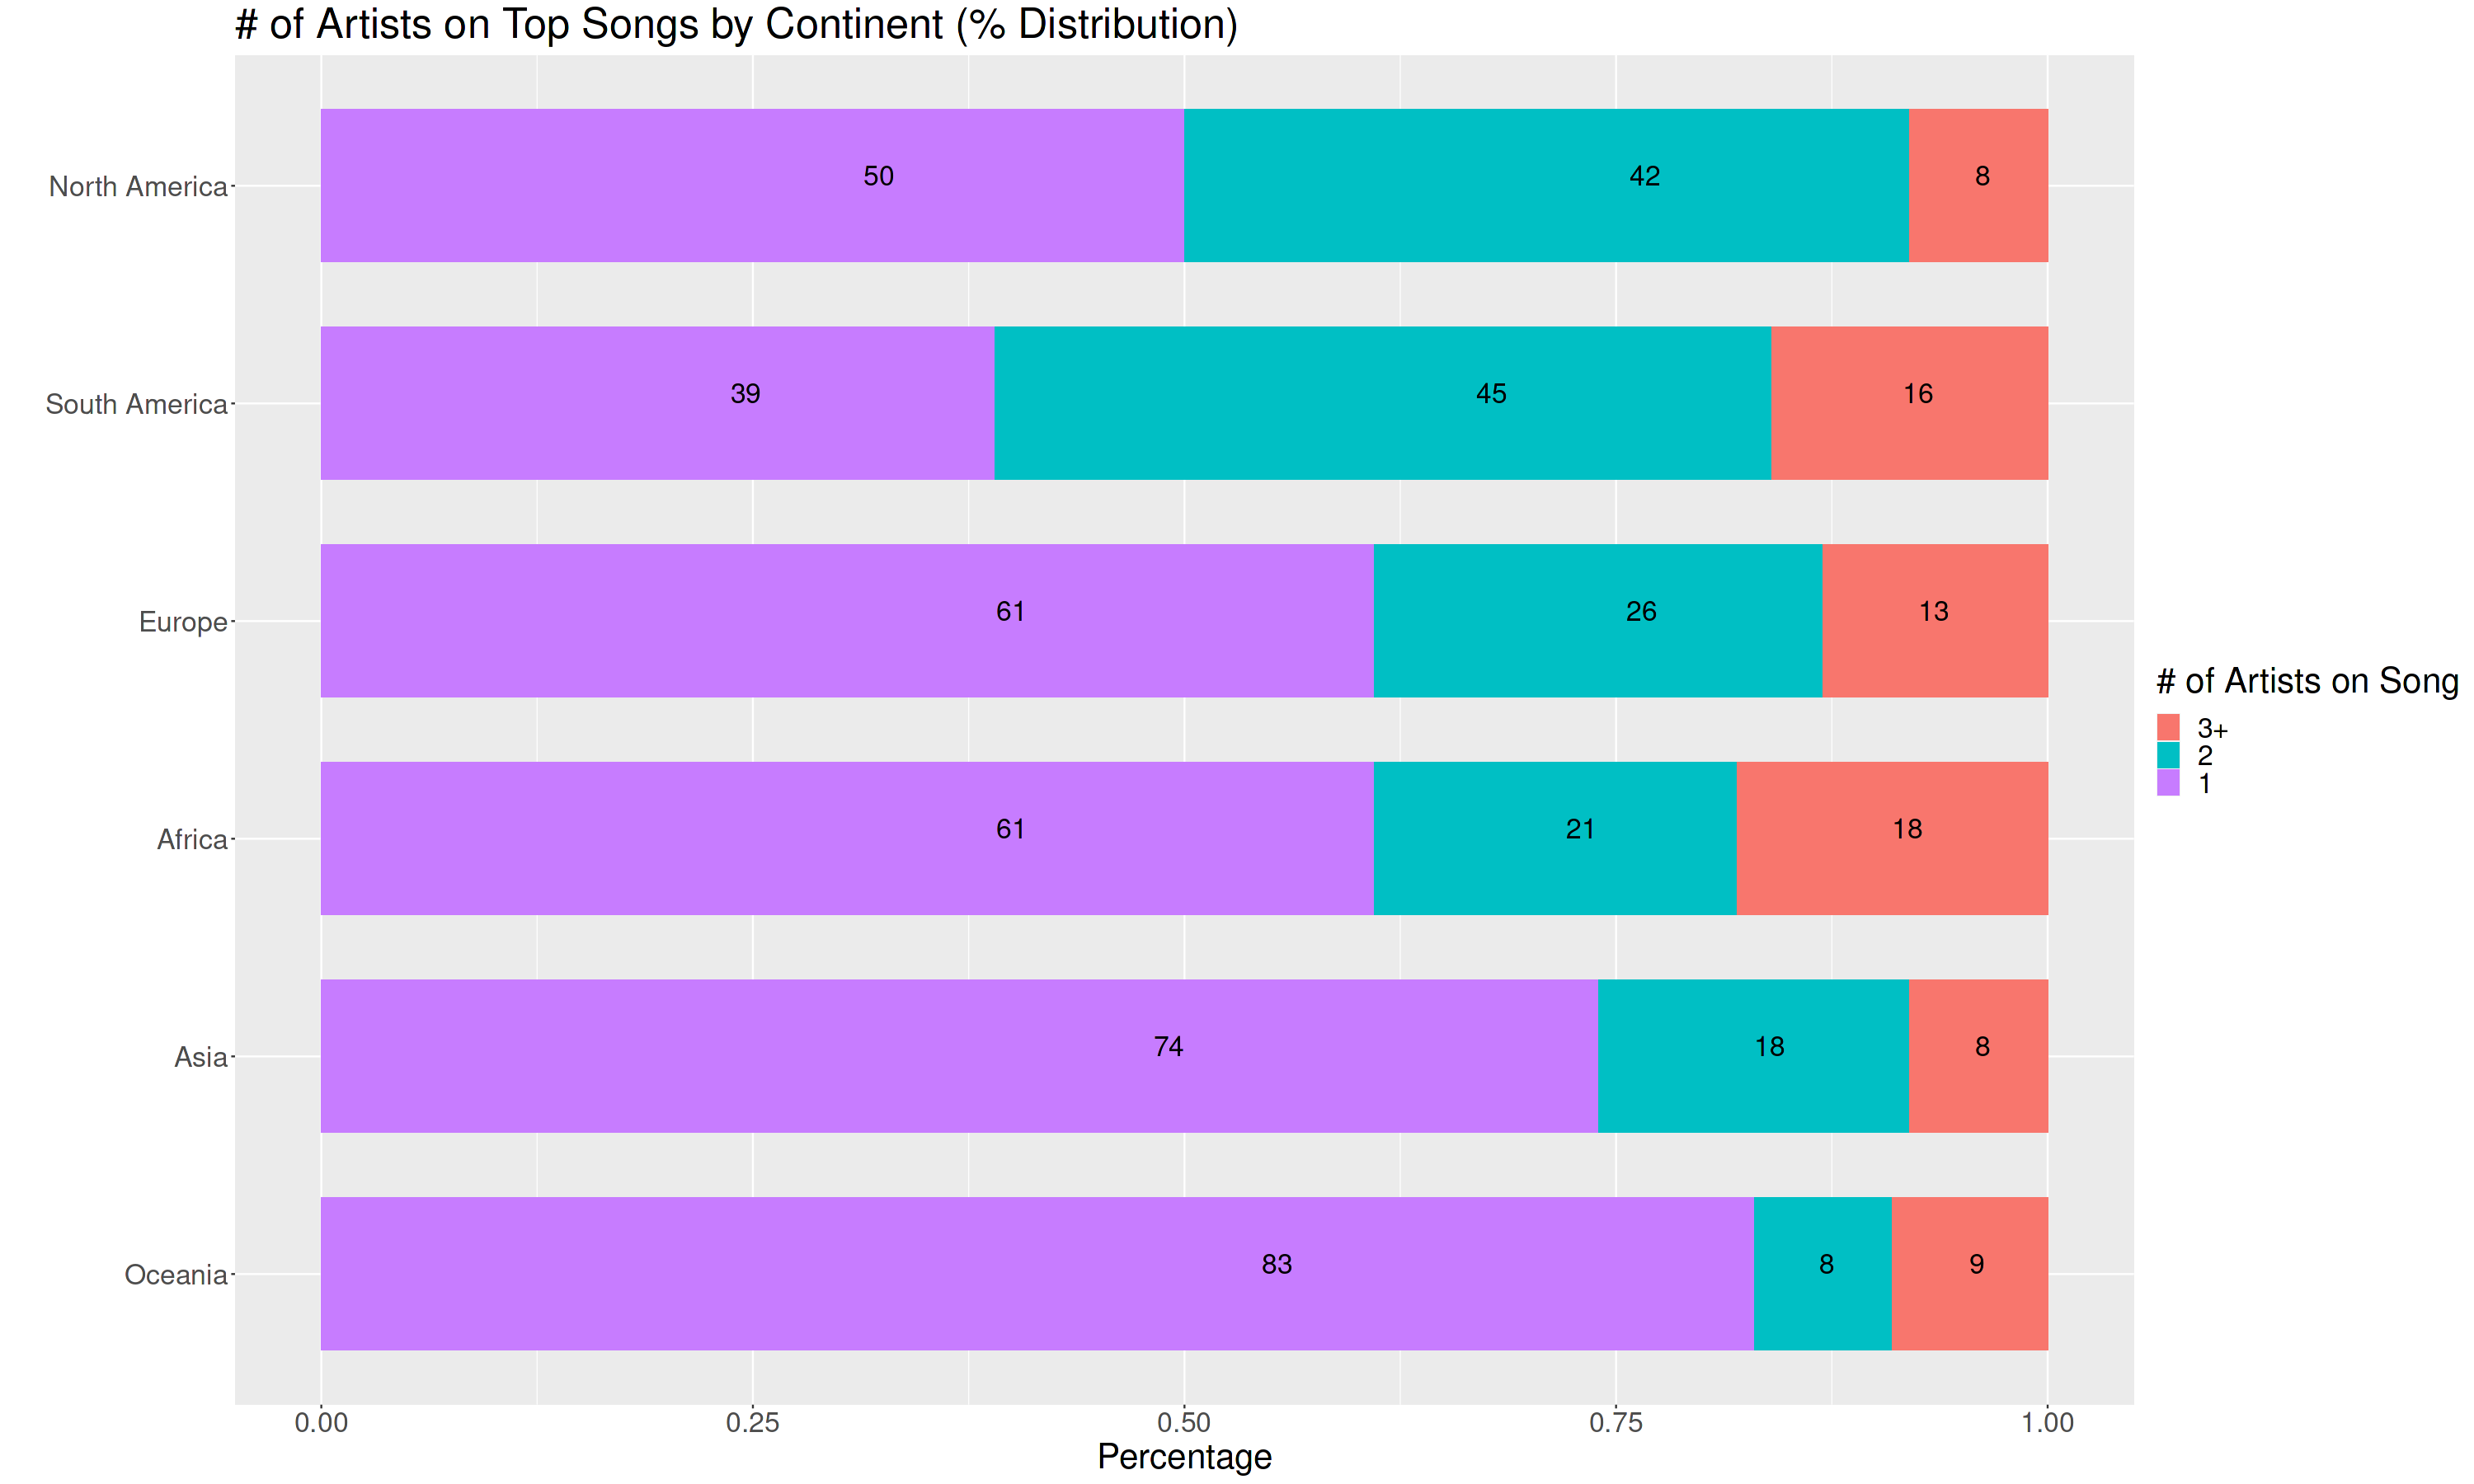

In [43]:
num_artists_summary1$Continent <- ordered(num_artists_summary1$Continent, levels = 
                                            c("Oceania", "Asia", "Africa", "Europe", "South America", "North America"))

num_artists_summary1$number_of_artists1 <- ordered(num_artists_summary1$number_of_artists1, levels = 
                                                     c("3+", "2", "1"))

ggplot(data = num_artists_summary1, aes(x = Continent, y = percentage, fill = number_of_artists1),
       show.legend = FALSE) + geom_col(position = "stack", width = 0.7)  + 
  geom_text(aes(label = round(percentage, 2)*100), size = 7, vjust = 0, hjust = 2, position = position_stack(0.7)) + 
  coord_flip() + labs(title = "# of Artists on Top Songs by Continent (% Distribution)", x= " ",y = "Percentage",
                      fill = "# of Artists on Song") +
  scale_fill_manual(values = c("#F8766D", "#00BFC4", "#C77CFF")) + theme(text = element_text(size = 25))

Key Insights:

South America's Spotify listeners are consuming the most collaborative music, as they are the only continent where songs with two artists is the most popular group (45%) instead of one artist. With artists such as Bad Bunny, Peso Pluma and Karol G being at the forefront of global music today, collaborations within and across different genres have become more prevelant and sought after by listeners. This seems to be the case in not just South America but North America (42% of Top Songs have 2 artists) where a large base of latin music listeners live. 

On the other side of the globe, Spotify consumers in Oceania and Asia heavily prefer songs with one primary artist at 83% and 74% respectively.

Europe and Africa have a similar breakdown, with both continents having the same percentage of top songs with one artist. However a difference is apparent when we look at the breakdown of multiple artists, with Africa having more songs with three or more artists by percentage. 

**ANALYSIS OF TOP STREAMED ARTISTS BY GEOGRAPHY**

Seeing how differently regions consume music just through analyzing the collaborative aspect of a song has sparked my interest in exploring these differences further by incorporating artist popularity into our analysis.

Let's find out the most popular primary artist for our 2 regional levels (country and continent) by adding counts for each primary artists' appearance on a chart and selecting the one with the highest value.

From there let's tally up the number of countries where an artist is the most popular at both a global and continental level. With these aggregations of the data we can hopefully gain further understanding of the current climate of music consumption at both a global and regional level. 

In [44]:
TopArtist <- SpotifyMerged4 %>% 
  select(Country, primary_artist, Continent) %>% 
  add_count(Country, primary_artist) %>%
  group_by(Country) %>% 
  slice_max(order_by = n, n = 1) %>% 
  rename(Top_Artist = primary_artist)

TopArtist = unique(TopArtist[c("Country", "Top_Artist")])

head(TopArtist, 72) %>%
  DT::datatable()

TopArtistCountSummary <- TopArtist %>% 
  group_by(Top_Artist) %>% 
  summarise(number_of_countries = n()) %>% 
  arrange(desc(number_of_countries))

head(TopArtistCountSummary, 38) %>%
  DT::datatable()

TopArtist1 <- SpotifyMerged4 %>% 
  select(Continent, primary_artist, ) %>% 
  add_count(Continent, primary_artist) %>%
  group_by(Continent) %>% 
  slice_max(order_by = n, n = 1) %>% 
  rename(Top_Artist = primary_artist)

TopArtist1 = unique(TopArtist1[c("Continent", "Top_Artist")])

head(TopArtist1, 6) %>%
  DT::datatable()

TopArtist2 <- SpotifyMerged4 %>% 
  select(Country, primary_artist, Continent) %>% 
  add_count(Country, primary_artist) %>%
  group_by(Country) %>% 
  slice_max(order_by = n, n = 1) %>% 
  rename(Top_Artist = primary_artist)

TopArtist2 = unique(TopArtist2[c("Country", "Top_Artist", "Continent")])

TopArtist2$Continent <- ordered(TopArtist2$Continent, levels = 
                                  c("North America", "South America", "Europe", "Africa", "Asia", "Oceania"))

TopArtistCountSummary1 <- TopArtist2 %>% 
  group_by(Top_Artist, Continent) %>% 
  summarise(number_of_countries = n(), .groups = "drop") %>% 
  arrange(Continent, desc(number_of_countries))

head(TopArtistCountSummary1, 43) %>%
  DT::datatable()

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

From the above summaries it is clear that Bad Bunny and Taylor Swift are the current top 2 artists on the planet. Each holding the title as the most streamed artist in 15 countries and 2 continents respectively, they are in a class of their own compared to other popular artist. 

14 out of the 15 countries where Bad Bunny is #1 are located in the Western Hemisphere (7 in North America and 7 in South America), proving his absolute dominance in the latin music market. Other notable artists that are popular in the Western hemisphere include Peso Pluma (top streaming artist in Mexico, population of almost 130 million people), Bizzarap (Argrentine DJ #1 in Argentina and Uruguay) and Taylor Swift (top streaming artist in Canada and The U.S.).

Speaking of Taylor Swift, her popularity doesn't seem to be as regionally correlated due to her presence in countries all over the world. 7 of the 15 countries where she is the top artist are located in Europe with the U.K., Ireland and The Netherlands being some of the noteworthy ones. Swift holds 4 spots in Asia as well as Oceania in it's entirety (Australia and New Zealand).

Africa has a different top artist for each of the four countries observed in the data; Egypt, Morocco, Nigeria and South Africa. Due to the vastness of the continent and the amount of seperation between the four countries, there aren't a lot of conclusive trends to state. With more African countries studied we could get a more complete picture of the streaming landscape of sub regions and the continent as a whole. Nigeria (the 6th most populated country on the planet), currently has homegrown artist ODUMODUBLVCK as their most streamed.

South Korean artist and member of K-POP superstar boyband BTS, Jung Kook has emerged as one of the most globally streamed artists. With the release of his debut solo album GOLDEN and his chart topping single "Seven", he is only behind Bad Bunny and Taylor Swift when it comes to streaming dominance on a global scale. During the measured time period, he is the top artist in four countries (all within Asia). Surprisingly to me (probably not to his listeners) he is the top artist in Saudi Arabia, showing the global reach that he and K-POP has as a whole!

**ANALYSIS OF TOP STREAMED ARTISTS AT A GLOBAL LEVEL**

Now that we have analyzed the top artists on Spotify at a continental and country level, it would be interesting to widen our analysis to a global scope and visualize the top artist by the count they appear on charts during the observed time period. Let's create a word cloud to visualize and filter in artists that appeared on the charts atleast 100 times.

In [45]:
ArtistCount <- SpotifyMerged4 %>% 
  add_count(primary_artist) %>% 
  arrange(desc(n)) %>% 
  filter(n >= 100)

ArtistCount = unique(ArtistCount[c("primary_artist", "n")])

wordcloud2(ArtistCount, color = "limegreen", backgroundColor = "black")

HTML widgets cannot be represented in plain text (need html)

Having an interactive visualization of the top artists (proportionally sized) can help us identify artists' global popularity in comparision to each other. Earlier we aggregated our data to determine that Bad Bunny and Taylor Swift were #1 in 15 countries a piece. But now we can identify Bad Bunny as the clear top artist in terms of total chart placements (6637 vs Swift's 4492). 

It also allows us to discover popular artists that charted many times but were outside of our observed scope of global top 10 and top 50 songs. One prime example is Mexican-American band Grupo Frontera who had tremendous staying power and over 1200 placement on various North/South American charts but reached the Spotify Global Top 50 only four times. 

**ANALYSIS OF TOP SONG ATTRIBUTES BY GEOGRAPHY**

Now let's turn our attention to how top song attributes compare at a country and continental level. Do regions have clear, identifiable listening preferences for certain song elements? Is there a global through line in what Spotify listeners look for in a top song? 

First let's analyze the attribute variables that have ranges from 0-1, so we can present their summarized values next to one another. Group the data at the two geographical levels and present the summaries in tabular and graphical form.

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

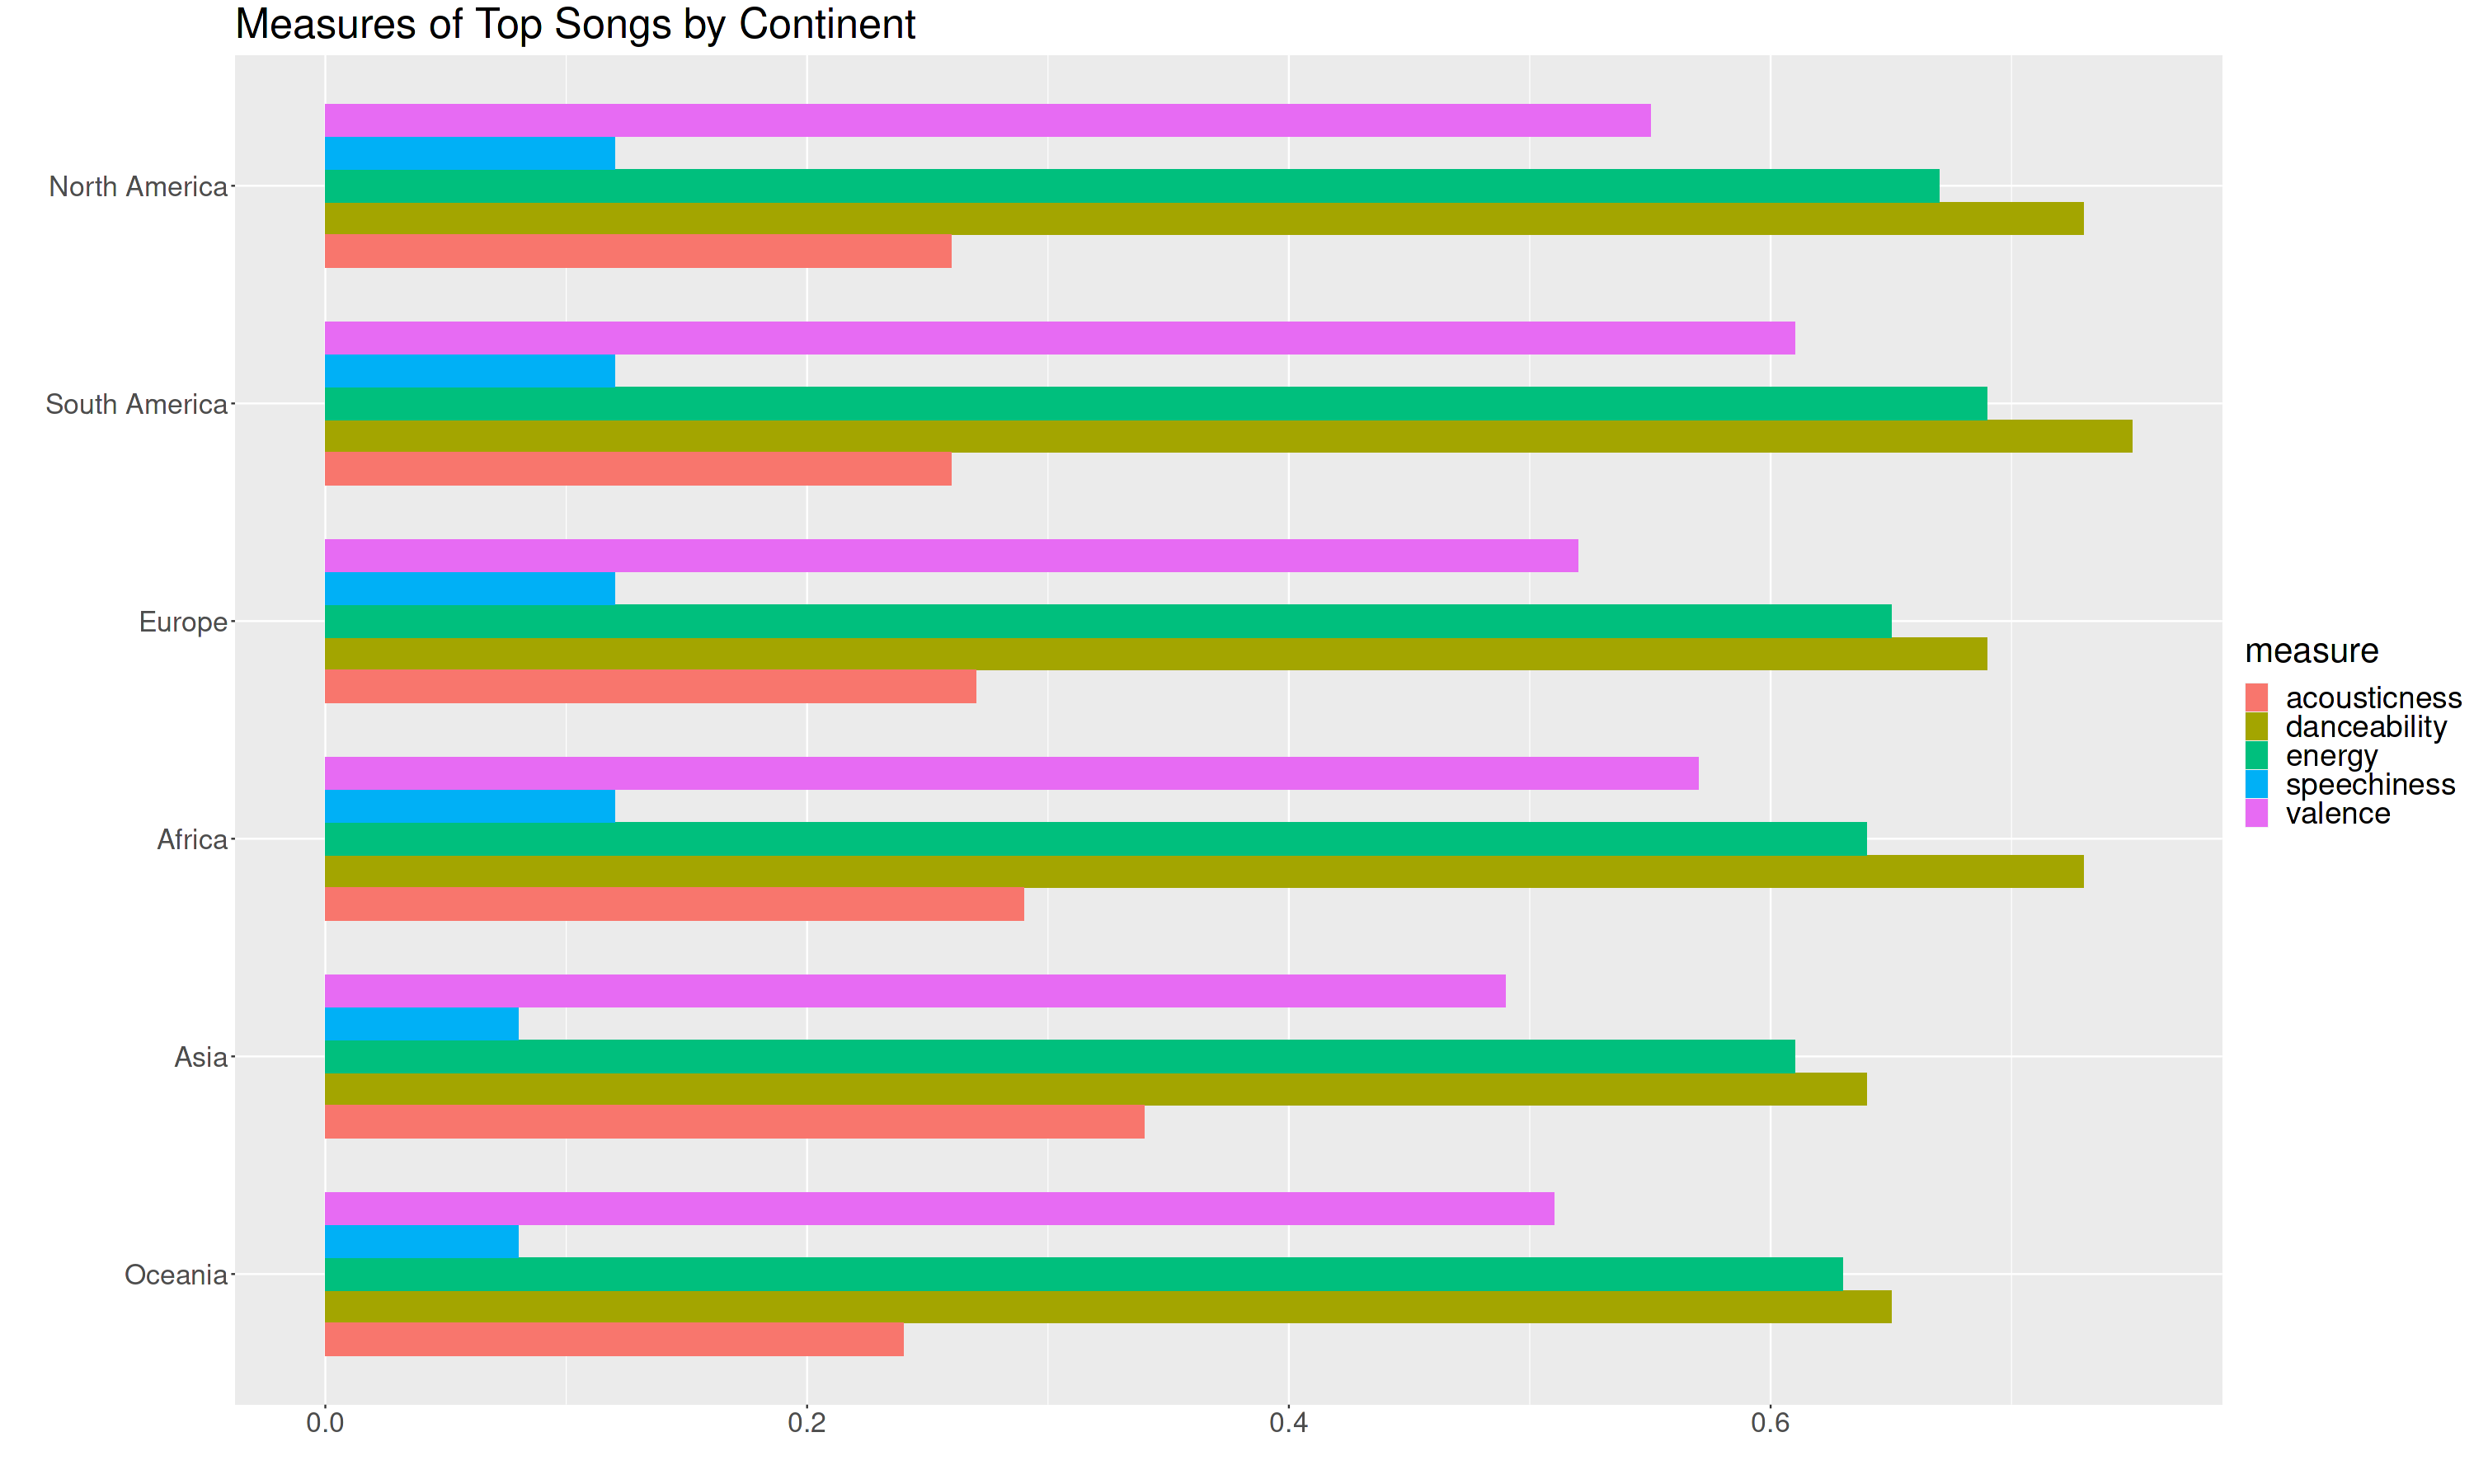

In [46]:
AttributesByCountry <- SpotifyMerged4 %>% 
  group_by(Continent, Country) %>% 
  summarise(danceability = round(mean(danceability),2), energy = round(mean(energy),2), speechiness = round(mean(speechiness),2),
            acousticness = round(mean(acousticness),2), valence = round(mean(valence),2), .groups = "drop")

head(AttributesByCountry, 72) %>% 
  DT::datatable()

AttributesByContinent <- SpotifyMerged4 %>% 
  group_by(Continent) %>% 
  summarise(danceability = round(mean(danceability),2), energy = round(mean(energy),2), speechiness = round(mean(speechiness),2),
            acousticness = round(mean(acousticness),2), valence = round(mean(valence),2)) 

head(AttributesByContinent, 6) %>%
  DT::datatable()

Attributes_long <- AttributesByContinent %>%
  pivot_longer(danceability:valence, names_to = "measure", values_to = "values")

Attributes_long$Continent <- ordered(Attributes_long$Continent, levels = 
  c("Oceania", "Asia", "Africa", "Europe", "South America", "North America"))

ggplot(data = Attributes_long, aes(x = Continent, y = values, fill = measure)) + 
  geom_col(position = "dodge", width = 0.75) + coord_flip() + labs(title = "Measures of Top Songs by Continent",
  x = "", y = "") + theme(legend.text = element_text(size = 22), text = element_text(size = 25))

South America has the highest danceability, energy and valence averages for their top streamed songs. It is also noteworthy that it has 5 placements in the top 10 countries for each of the mentioned attributes. Streaming artists like Bad Bunny who has very danceable, energetic songs and Peso Pluma who's music is measured as very positive (high valence) contributes to South America's #1 position among continents. 

Asia has the highest mean value for acousticness and the lowest mean value for speechiness with Indonesia represnting both of those attribute extremes among all countries (0.51 acousticness, 0.04 speechiness). Although Asia has the lowest speechiness element in its top songs, it is tied with Oceania at 0.08 and there is not much variance amongst the other continents (range of 0.04).

After analyzing these summaries, there seems to be some correlation between certain song measures, both positive and negative. Danceability and valence values rank in the same order among the continents, indicating that they have some degree of positive correlation. It would be interesting to investigate the relationship between these variables but first let's continue to analyze the remaining song attributes.

Next let's take a closer look into the 3 remaning continuous variables: loudness, tempo and song duration.

In [47]:
ContVarSummary <- SpotifyMerged4 %>% 
  group_by(Continent, Country) %>% 
  summarise(loudness = round(mean(loudness), 2), tempo = round(mean(tempo), 2), 
            duration_m = round(mean(duration_m), 2), .groups = "drop")

SpotifyMerged4$Continent <- ordered(SpotifyMerged4$Continent, levels = 
                                       c("North America", "South America", "Europe", "Africa", "Asia", "Oceania"))

head(ContVarSummary, 72) %>%
  DT::datatable()

ContVarSummary1 <- SpotifyMerged4 %>% 
  group_by(Continent) %>% 
  summarise(loudness = round(mean(loudness), 2), tempo = round(mean(tempo), 2), 
            duration_m = round(mean(duration_m), 2))

head(ContVarSummary1, 6) %>%
  DT::datatable()

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

Surprisingly the range in average tempo among continents as rather narrow at only 5.62 beats per minute. My assumption going into this analysis was that there would be more variance between continents as tempo can range substanially depending on the musical genre. For example, Hip-Hop can range between 85-115 bpm while dubstep typically hovers around 140 bpm. The closeness in values points to the top streamed songs having similar tempos on average. Regionally bordering countries, India and Pakistan share the top 2 spots for the slowest tempo.

All continents' mean song duration fall between 3 and 4 minutes with Europe having the shortest at 3.04 mins and Africa having the longest at 3.66 mins. South Africa holds the title for longest song duration at almost 5 minutes and is almost a whole minute longer than the second ranked country, Indonesia. Learning that Africa has the most songs with 3 or more credited artists (18%) in our previous analysis of song collaboration, we can assume that this factors in to it's high song duration mean.

Referencing Spotify's web documentation, loudness values will typically fall in the range of -60 and 0 decibels. The range in mean loudness between continents measures at only 2.5 db. This can point to a degree of commonality in the way top hit songs of today are produced and mastered regardless of where the music is coming from. South American listeners have the highest tendancy to listen to louder music, fitting right into their profile of high energy and high danceability music consumers. 

Lastly, let's analyze our 2 categorical variables (key of song and modality) visualizing the frequencies of each group to determine any similarities/differences at a geographical level.

HTML widgets cannot be represented in plain text (need html)

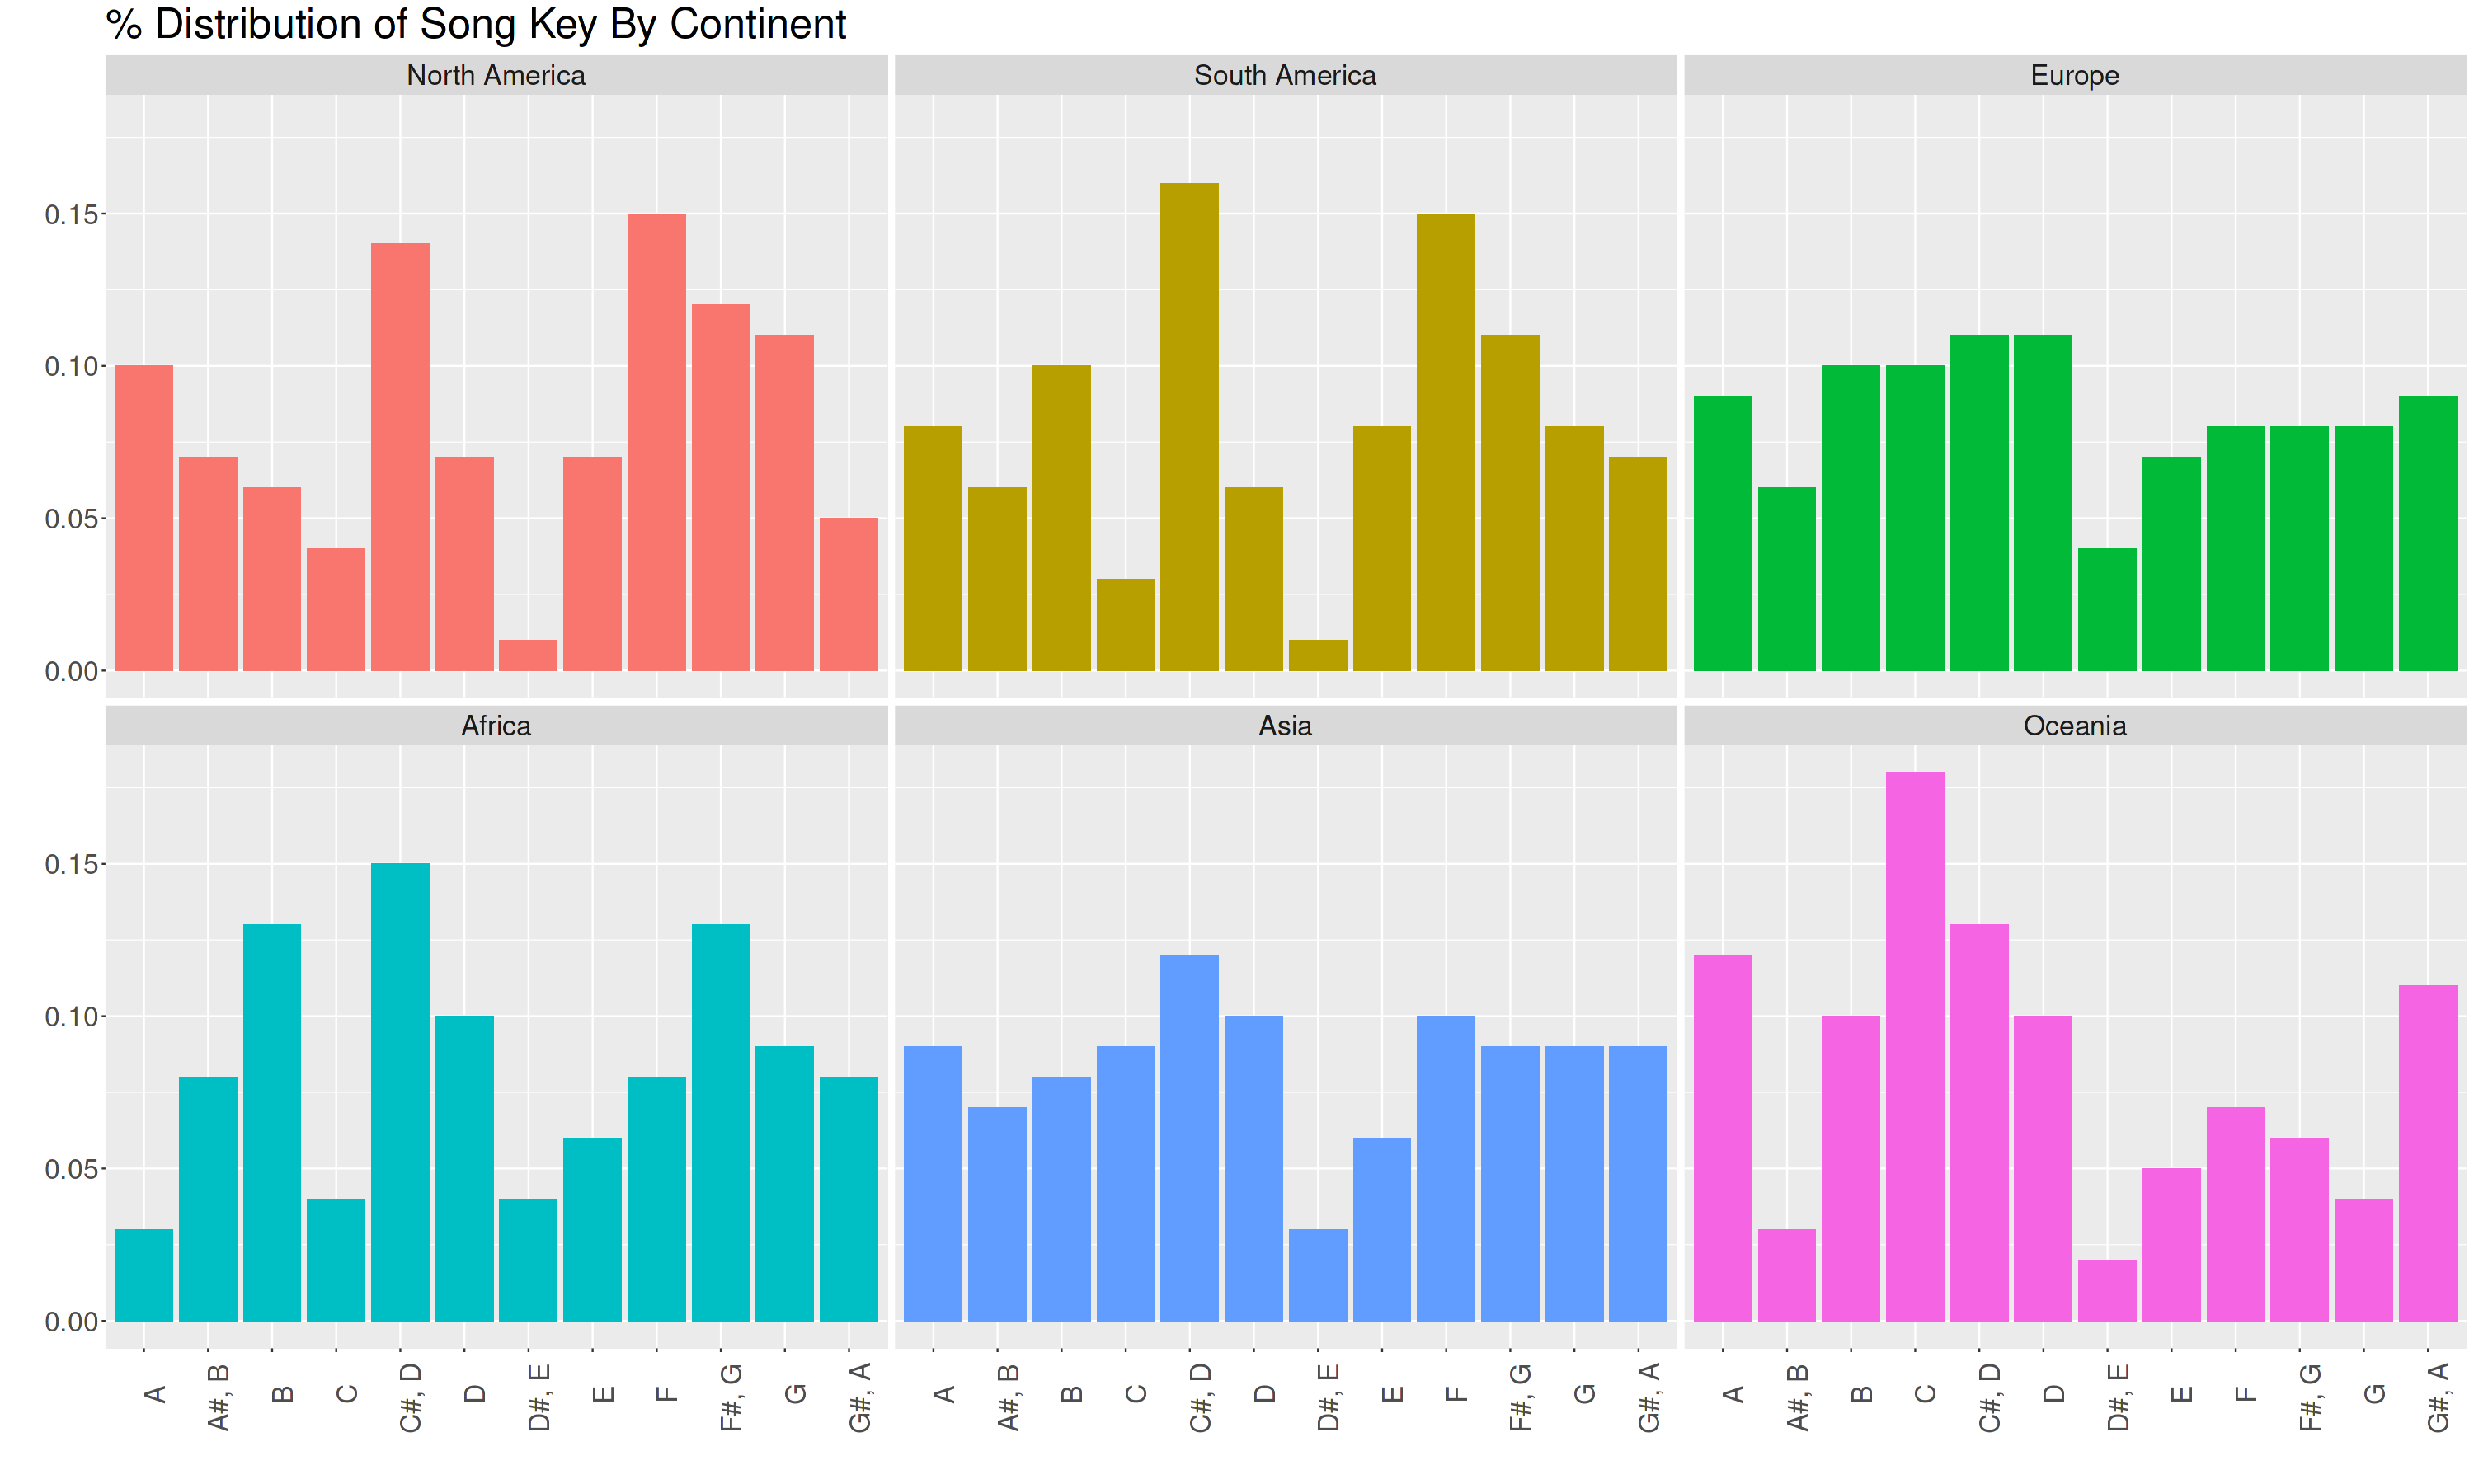

In [48]:
KeySummary <- SpotifyMerged4 %>% 
  group_by(Continent, key) %>% 
  summarise(count = n(), .groups = "drop")

KeySummary1 <- KeySummary %>% 
  add_count(Continent, wt = count, name = "Total") %>% 
  mutate(percentage = round(count/Total,2)) %>% 
  select(Continent, key, percentage)

head(KeySummary1, 72) %>%
  DT::datatable()

ggplot(data = KeySummary1, aes(x = key, y = percentage, fill = Continent)) +
  geom_col() + facet_wrap(~Continent, nrow = 2) + theme(axis.text.x = element_text(angle = 90)) +
  scale_fill_manual(values=c("#F8766D", "#B79F00", "#00BA38", "#00BFC4", "#619CFF", "#F564E3")) +
  labs(title = "% Distribution of Song Key By Continent", x = "", y = "") + theme(legend.position = "none", 
  text = element_text(size = 25))

Once again commonalities between North and South America are apparent as the continents song keys are distributed at very similar frequencies. C#/D♭, F and F#/G♭ are the top 3 most frequent song keys for both continents. This is not surprising considering the other parrells they share in streaming preferences (same favorite artists, similar song attributes, etc.).

Europe and Asia also share a very similar breakdown of keys for their top streamed songs. In this case, their distributions are very uniform and no key is identified as a clear favorite by the contients' listeners. C#/D♭ again has the highest frequency at 12% for Asia and 11% for Europe.

Africa also has C# as its most popular followed by B and F#. Interestingly, it is the only continent where D#/E♭ isn't the key with the lowest count. 

Oceania has a clear favorability towards songs in the key of C (18%). The continent's favorite artists like Taylor Swift, Miley Cyrus and Billie Eilish all have very popular songs in that key. 

HTML widgets cannot be represented in plain text (need html)

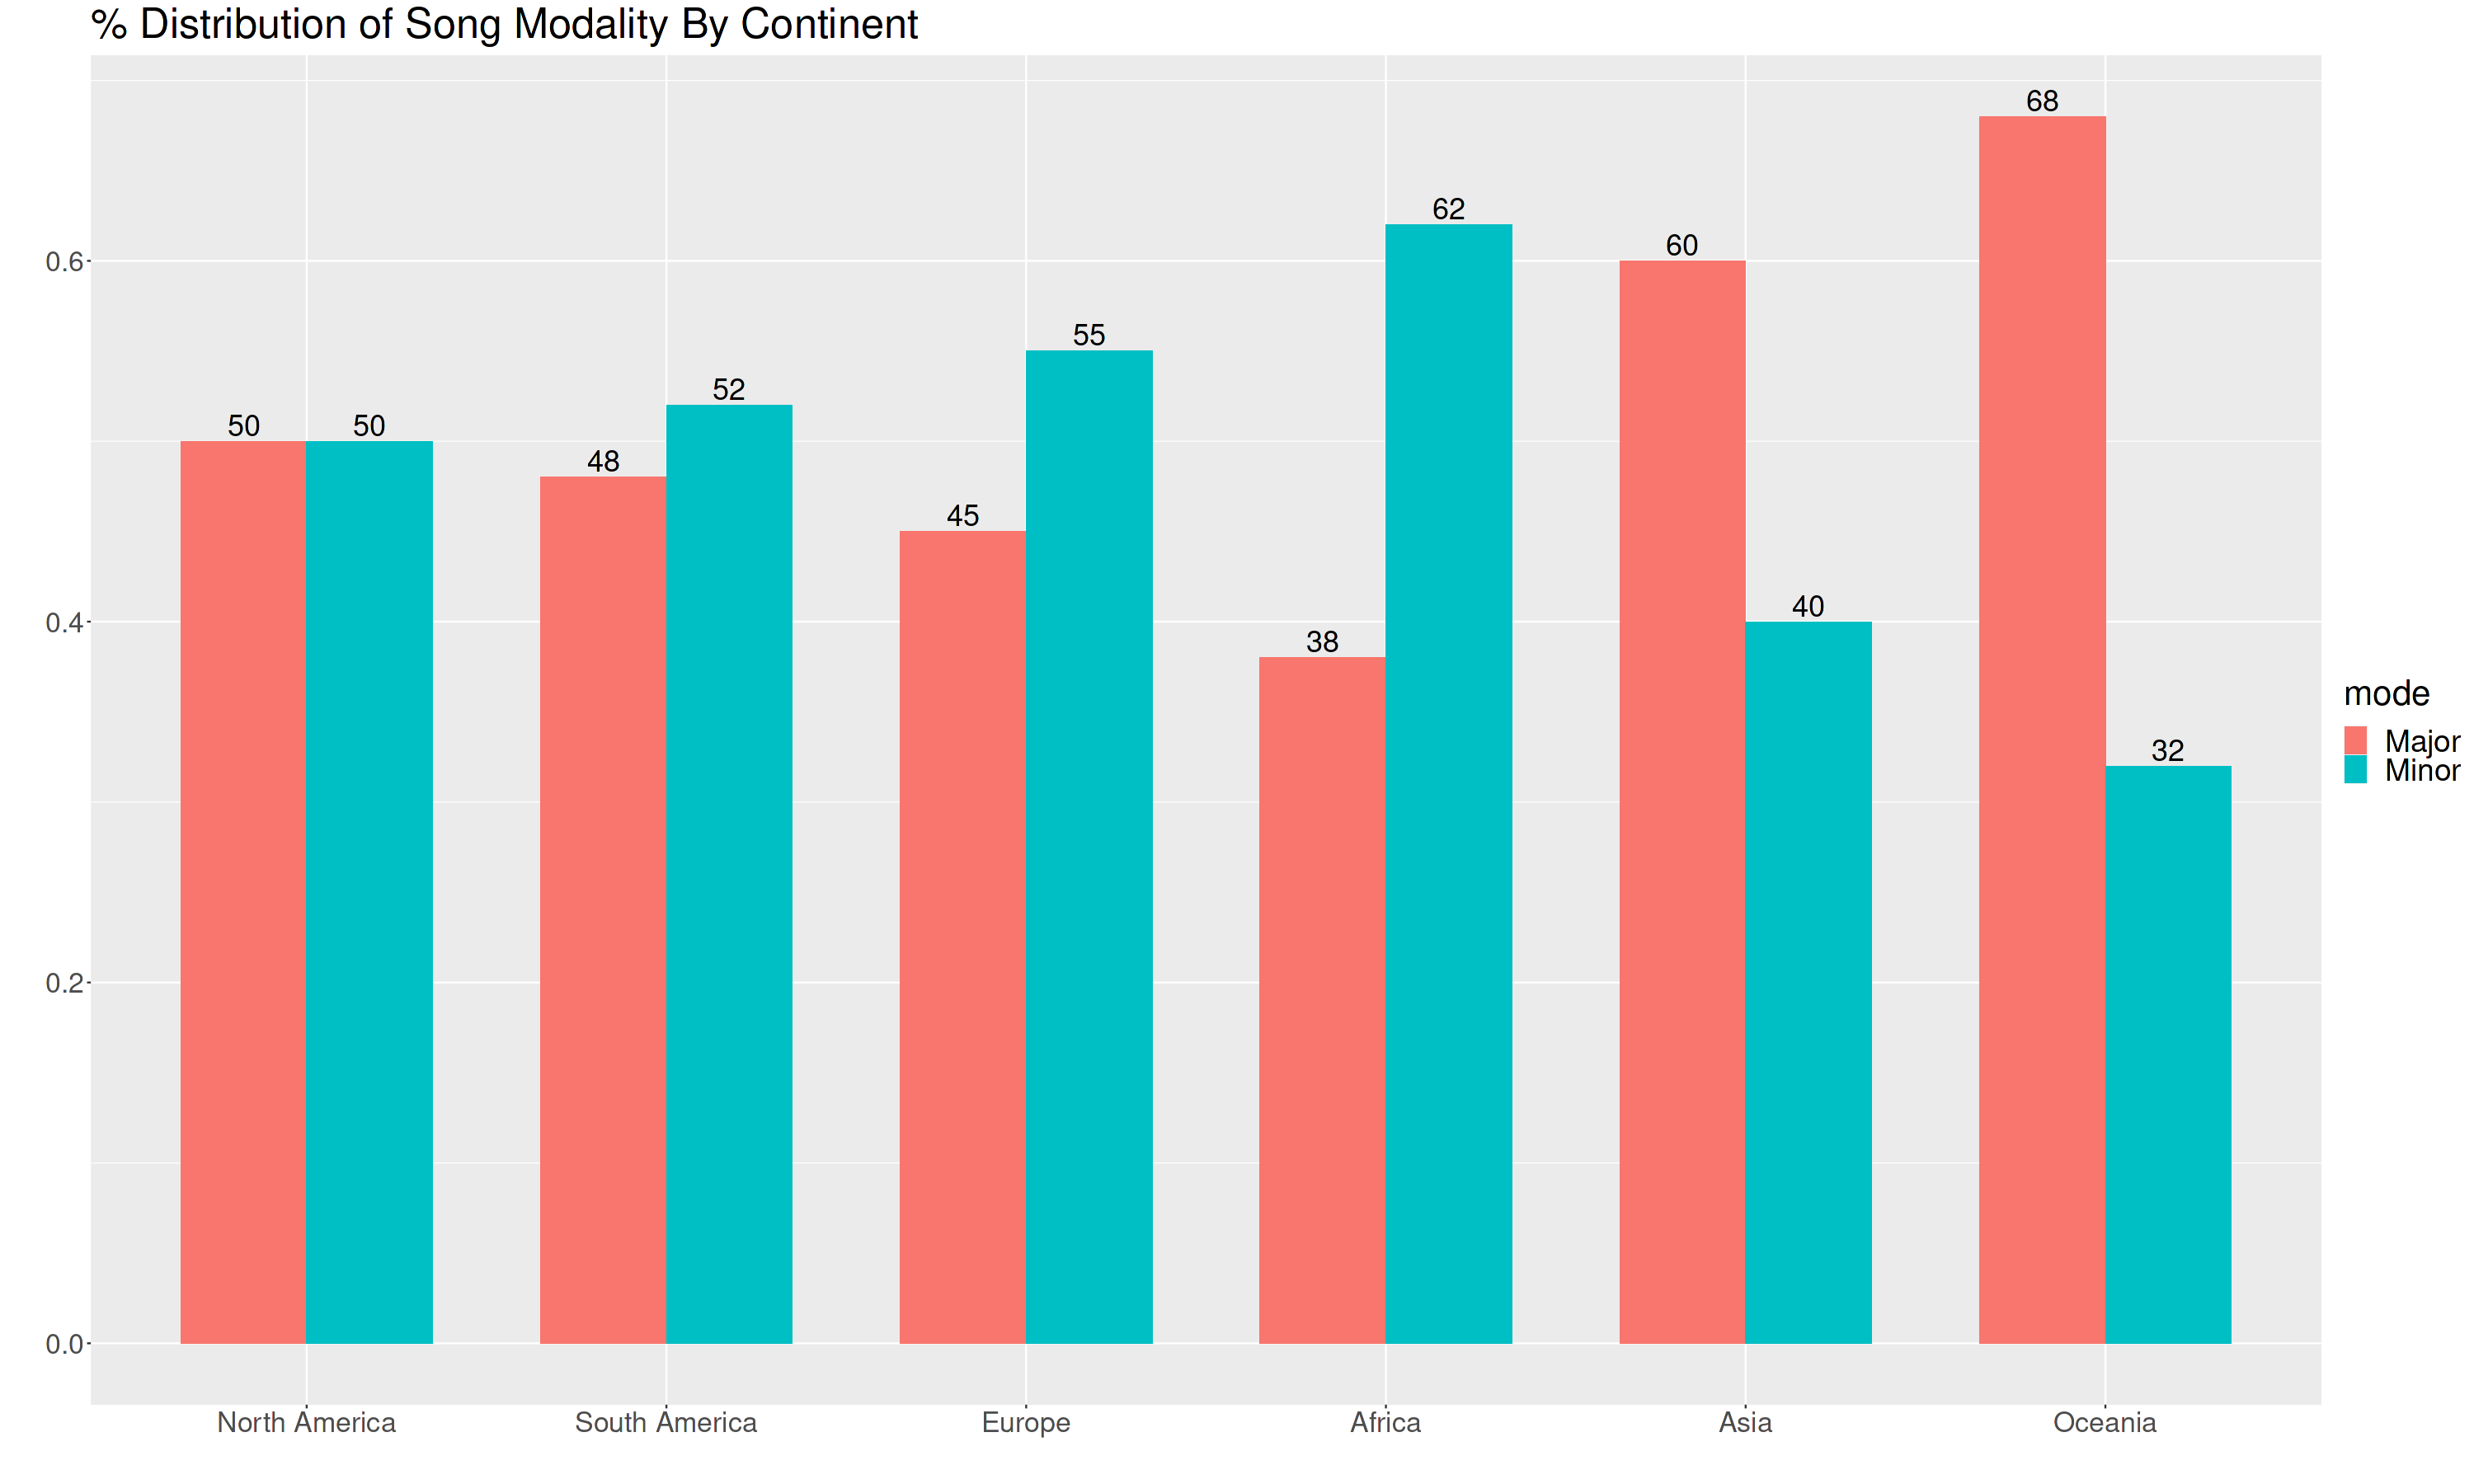

In [49]:
ModeSummary <- SpotifyMerged4 %>% 
  group_by(Continent, mode) %>% 
  summarise(count = n(), .groups = "drop")

ModeSummary1 <- ModeSummary %>% 
  add_count(Continent, wt = count, name = "Total") %>% 
  mutate(percentage = round(count/Total,2)) %>% 
  select(Continent, mode, percentage)

head(ModeSummary1, 72) %>%
  DT::datatable()

ggplot(data = ModeSummary1, aes(x = Continent, y = percentage, fill = mode)) +
  geom_col(position = "dodge", width = 0.7) +
  labs(title = "% Distribution of Song Modality By Continent", x = "", y = "") +
  theme(legend.text = element_text(size = 22), text = element_text(size = 25)) + geom_text(aes(label = round(percentage, 2)*100),
                                                            size = 7.5, vjust = -0.25, hjust = 0.5, 
                                                            position = position_dodge(width = 0.7))

North America, South America and Europe all have similar frequency breakdowns between songs in major and minor keys; all at almost a 1:1 ratio. Africa is the continent that has the highest percentage of top streamed songs being in a minor key (62%). Asia and Oceania continue to have similar preferences, this time to songs in major keys. However, Oceania once again has the most apparent partiallity to an attribute, with an almost 7:3 major-minor song ratio. Songs like Taylor Swift's "Cruel Summer" and "Is it Over Now" that are in a major key and have an anthemic, uplifting feel seem to be especially popular amongst Spotify listeners in Oceania.

**CORRELATION OF TOP SONG ATTRIBUTES**

Now that we have looked into the numerous attributes of top songs at a geographical level, let's end our analysis on creating a correlation plot to see how the continuous song measures relate to each other overall.

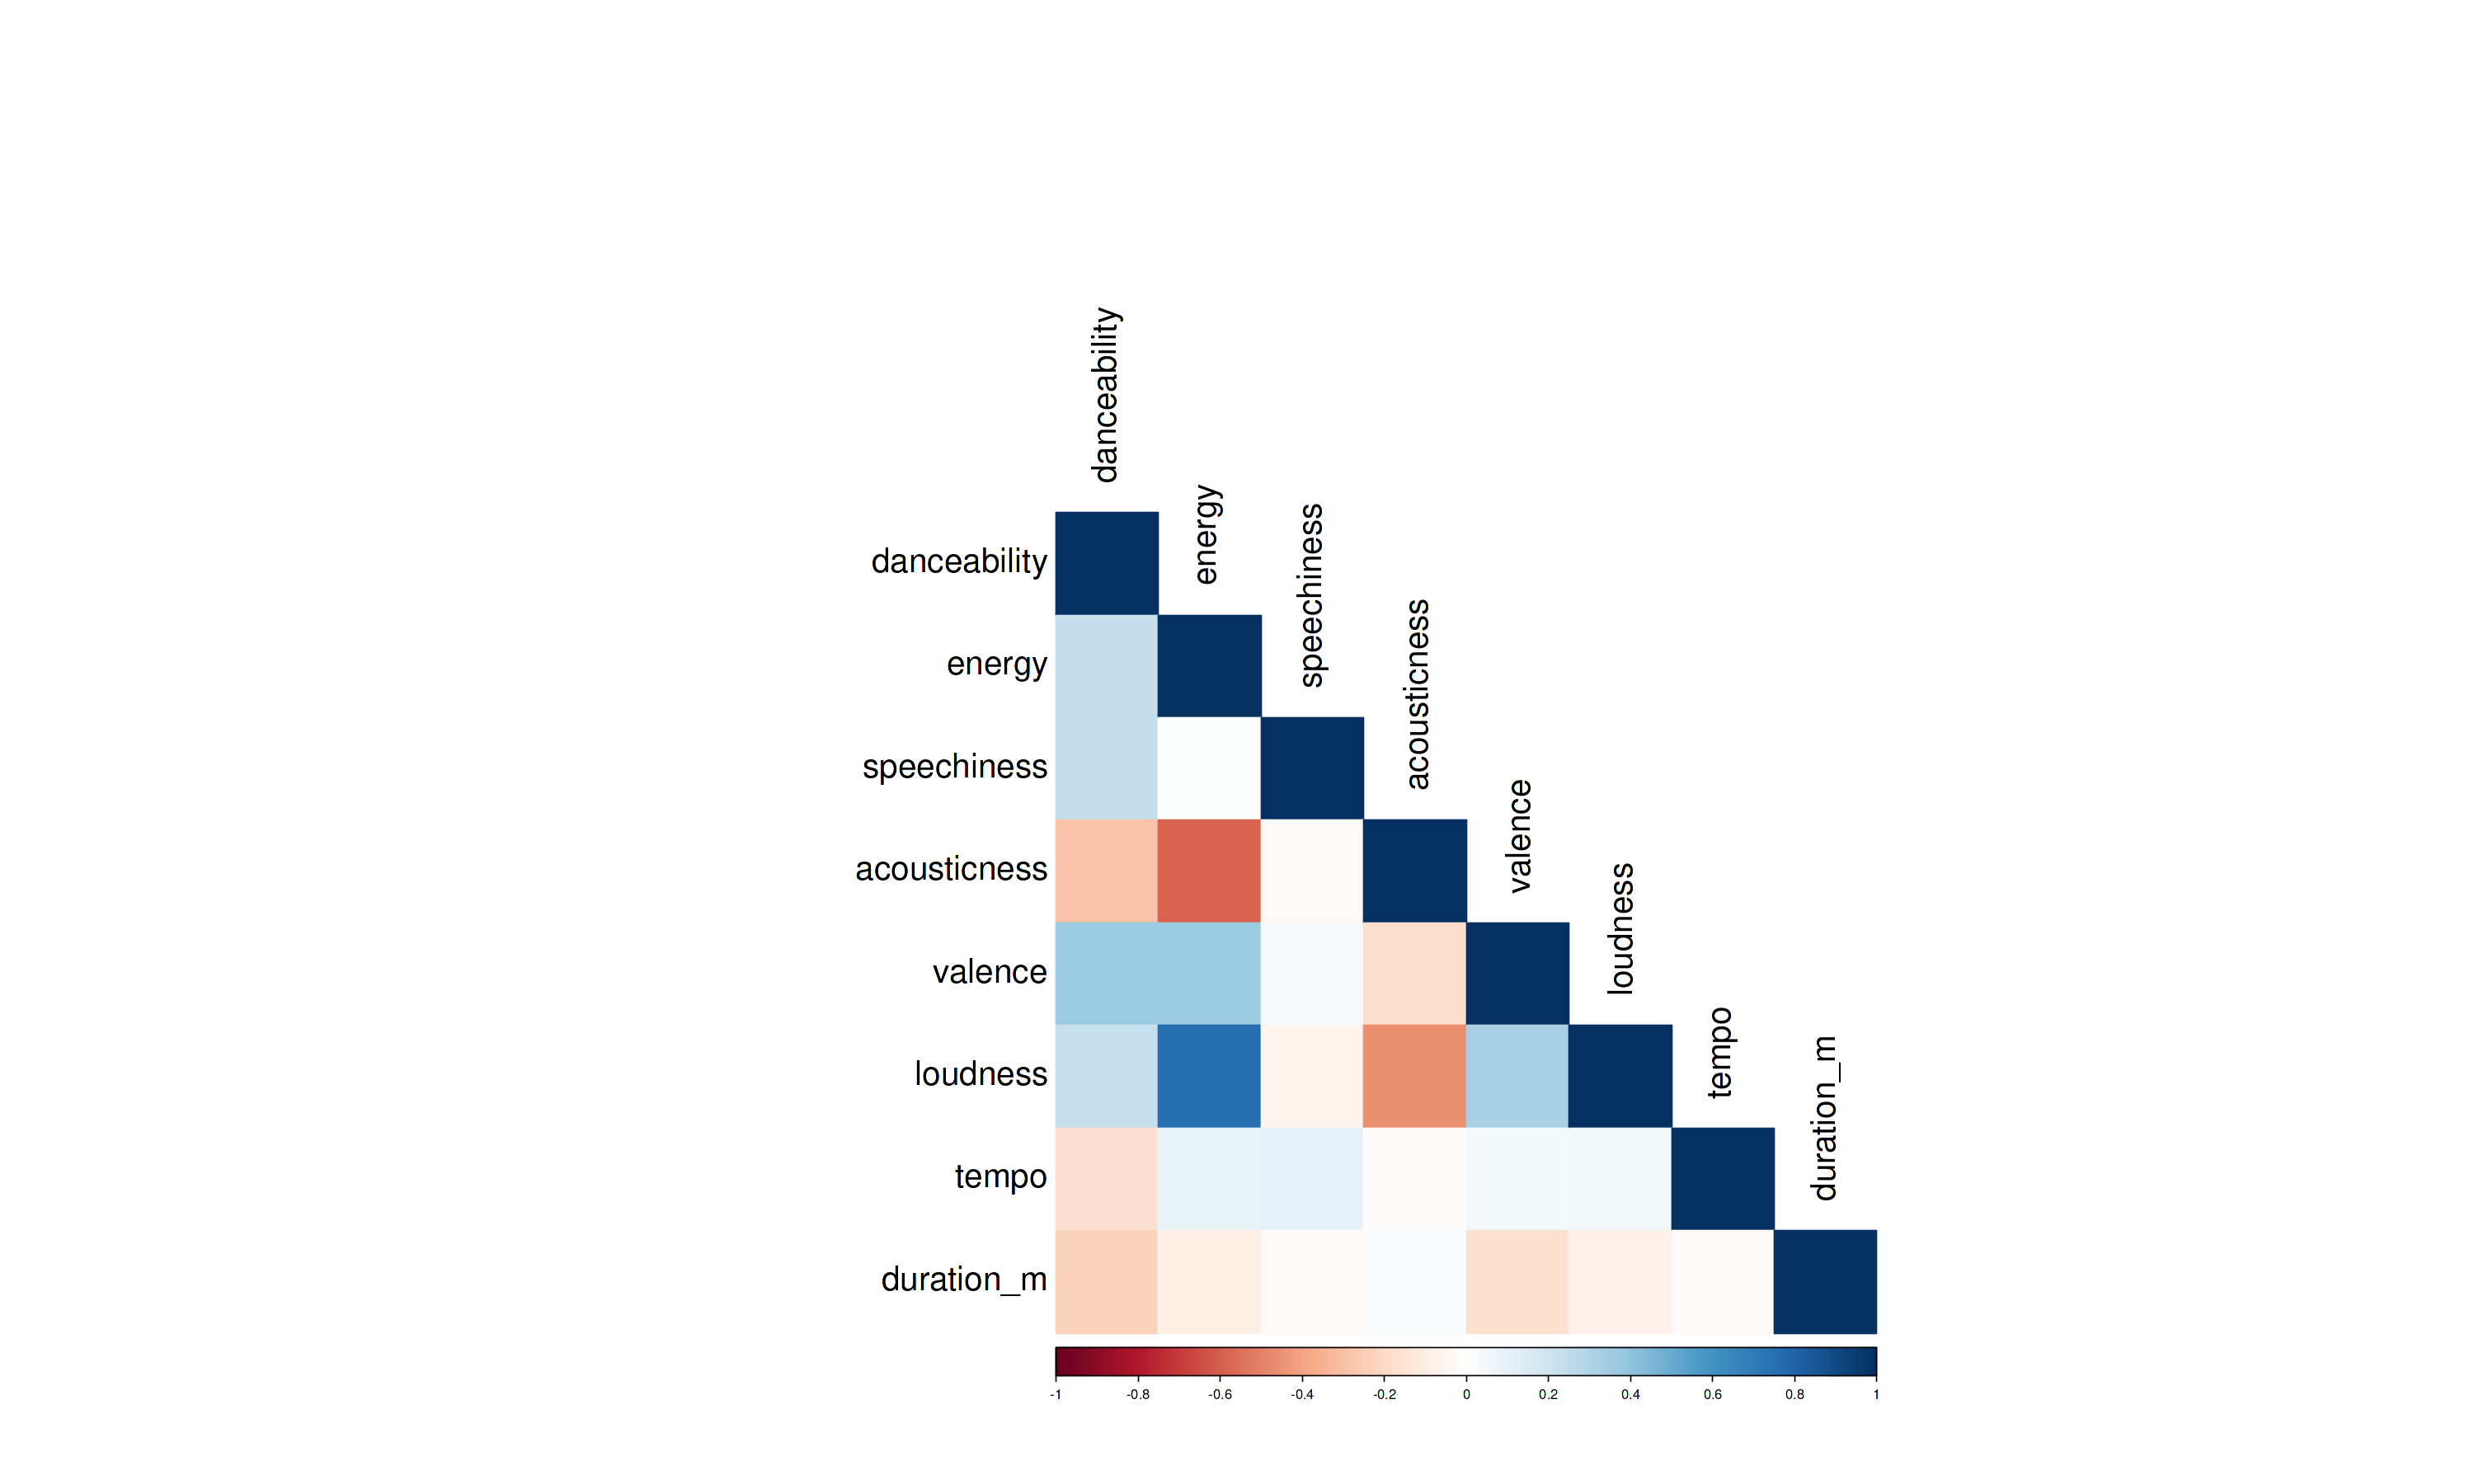

In [50]:
corrplot(cor(SpotifyMerged4[c("danceability","energy", "speechiness", "acousticness", "valence", "loudness",
                              "tempo", "duration_m")]), type = "lower", method="color", tl.col="black", mar=c(0,0,2,0), tl.cex = 2) 

Top 3 Positve Variable Associations:

- Loudness - Energy
- Valence - Danceability
- Valence - Energy

Top 3 Negative Variable Associations:

- Acousticness - Energy
- Acousticness - Loudness
- Acousticness - Danceability

Highly spirited music with loud vocals and percussion such as Tate McRae's "greedy" and Bad Bunny's "PERRO NEGRO" are clear examples of top songs that have both very high energy and loudness measures.

Examining high inverse relationship between attributes, songs such as slow paced and reflective "My Love Mine All Mine" by Mitski exemplify the negative correlation between an acoustic sound and low energy, danceability and loudness. 